In [ ]:
# Importing necessary libraries
!pip install catboost xgboost imbalanced-learn scikit-learn tensorflow
!pip install numpy pandas scikit-learn imbalanced-learn xgboost tensorflow matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


Categorical Columns: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
Numerical Columns: ['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


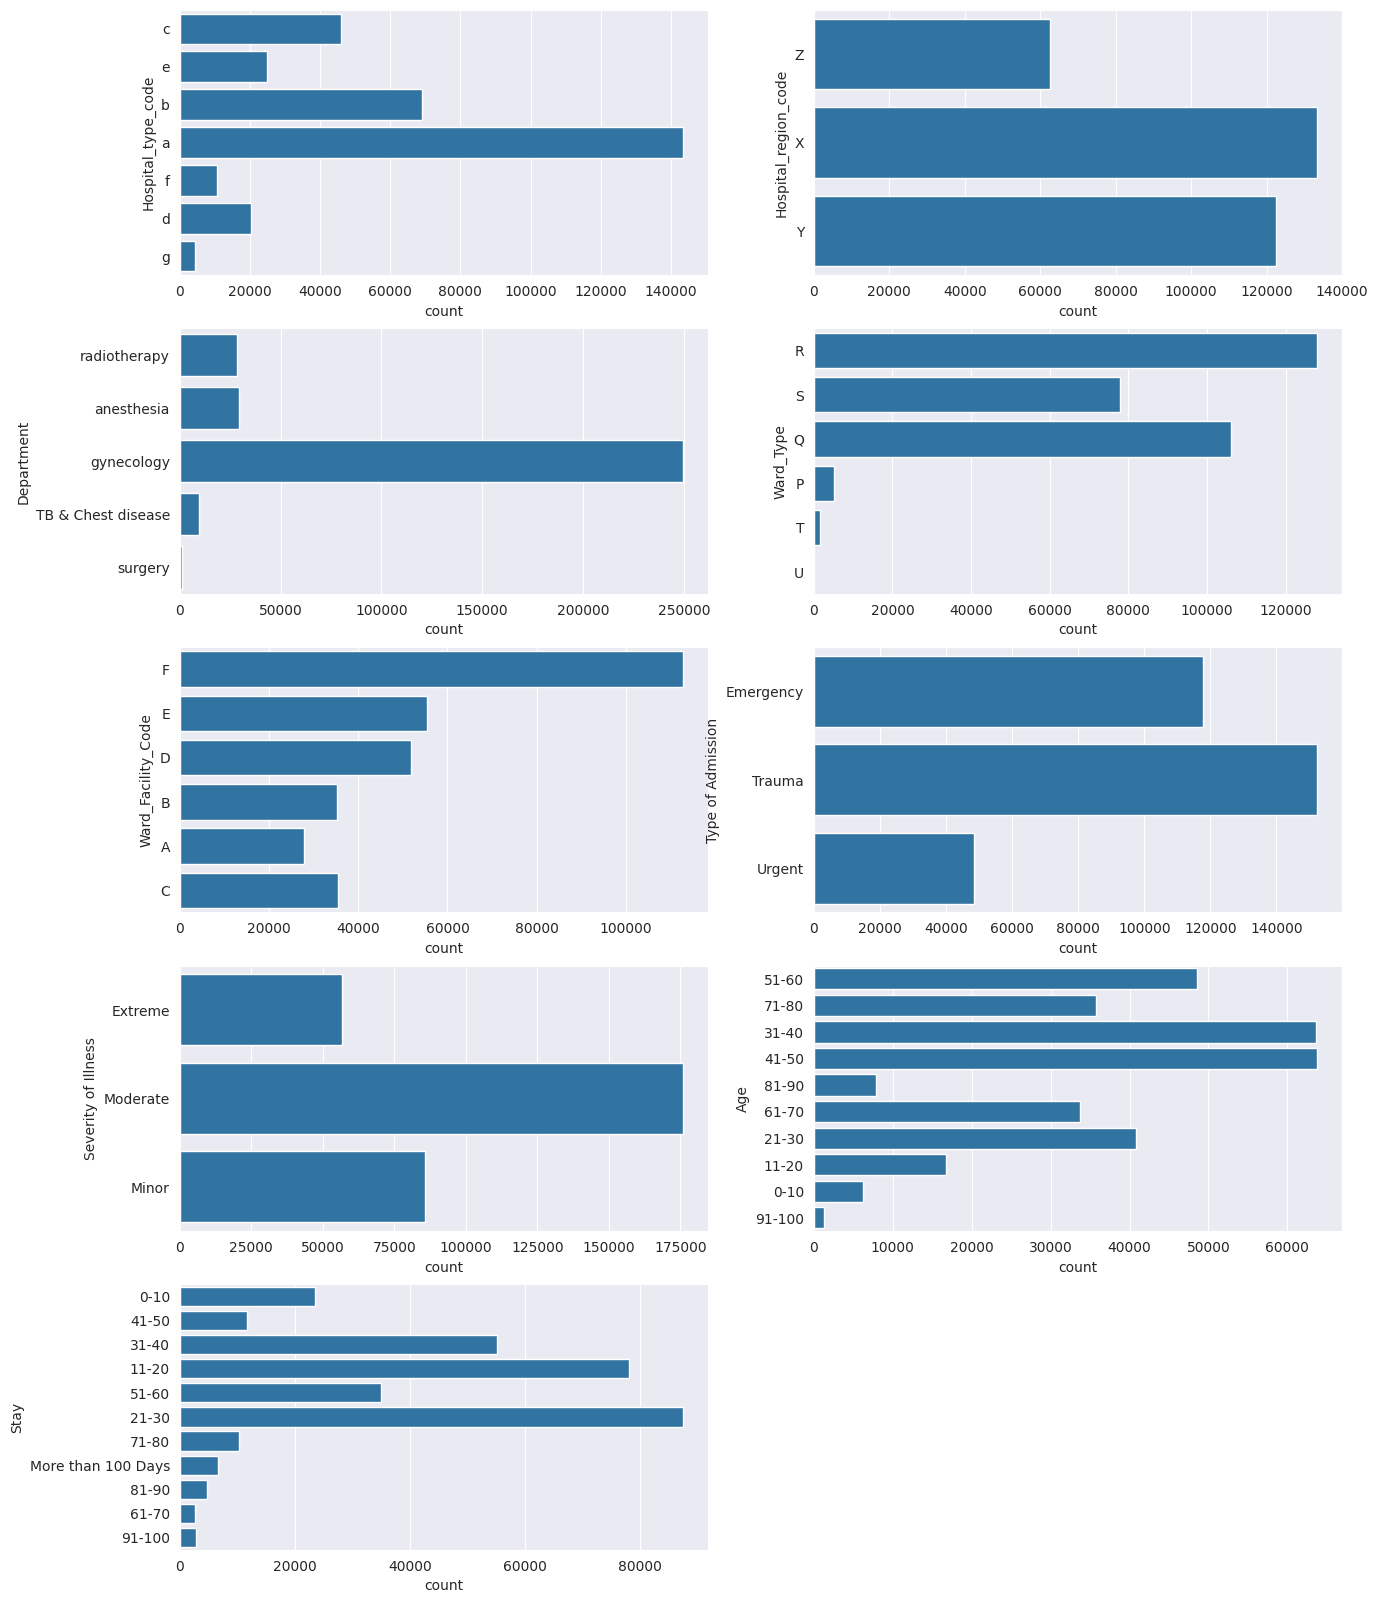

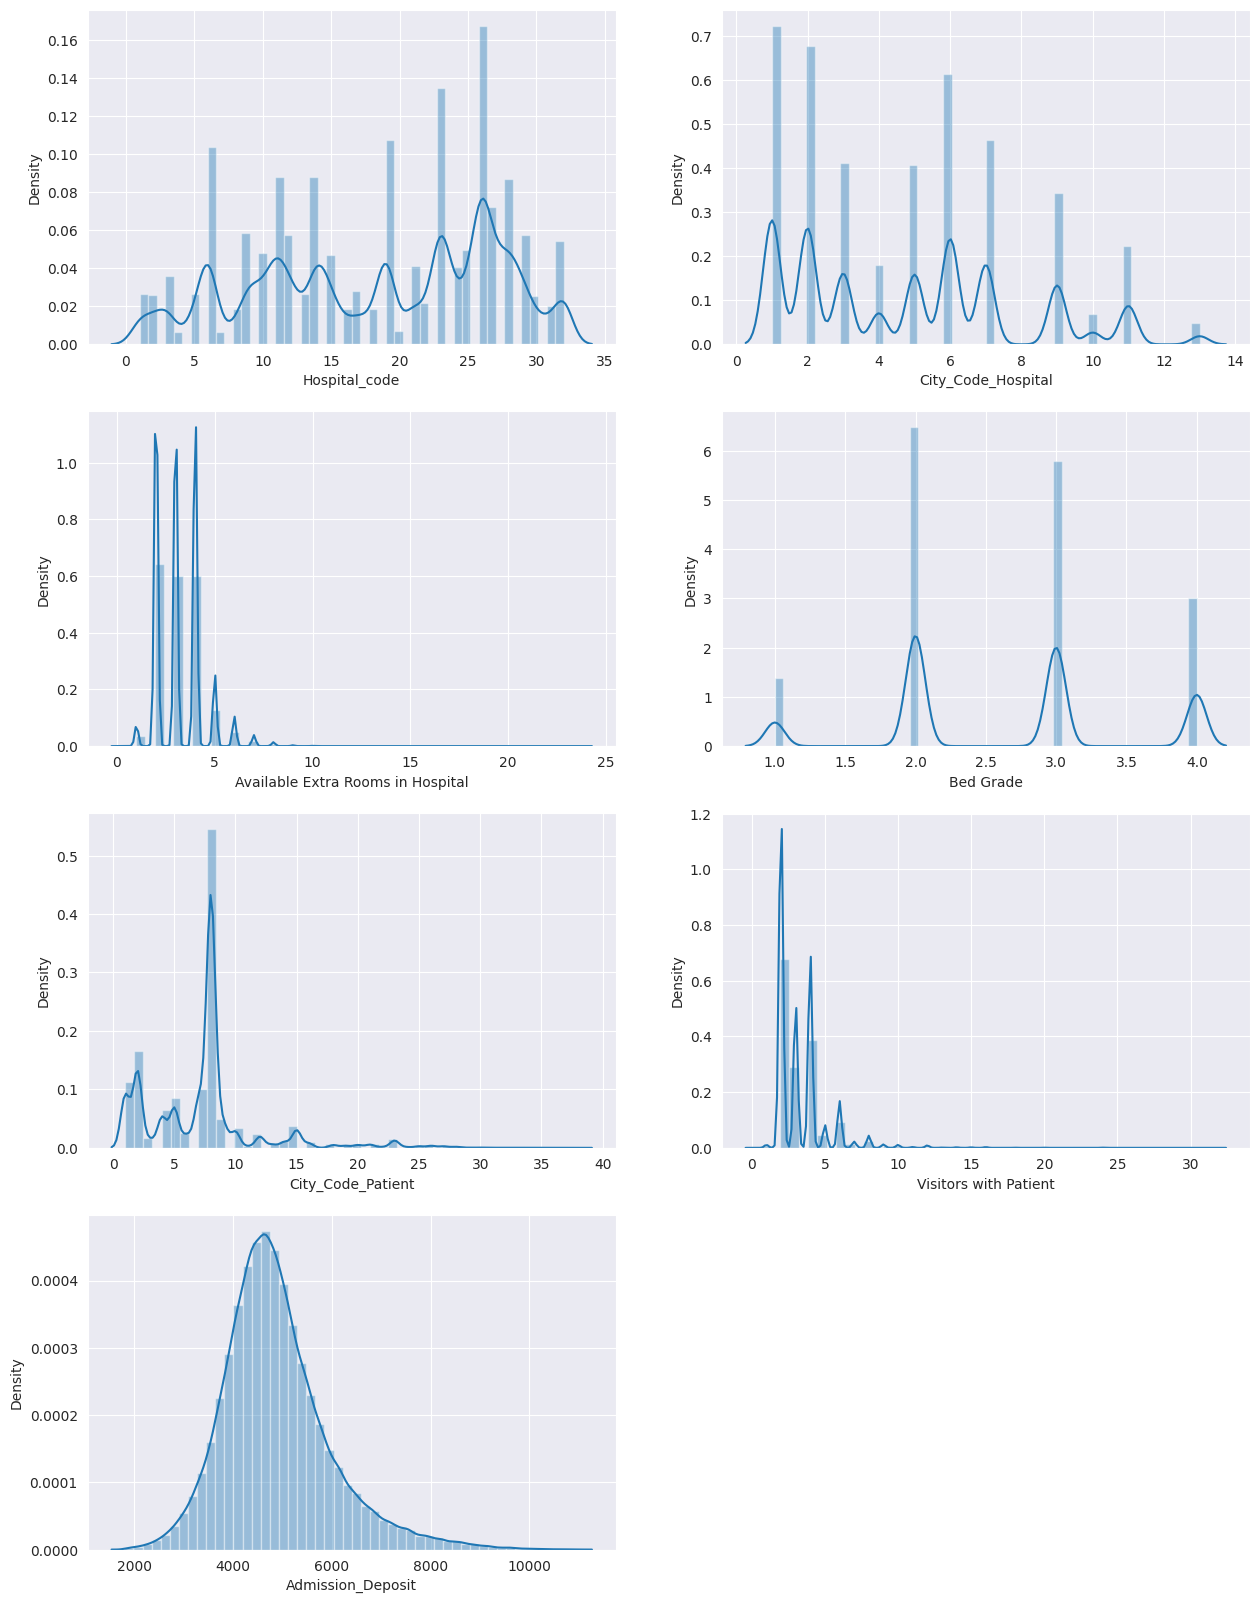

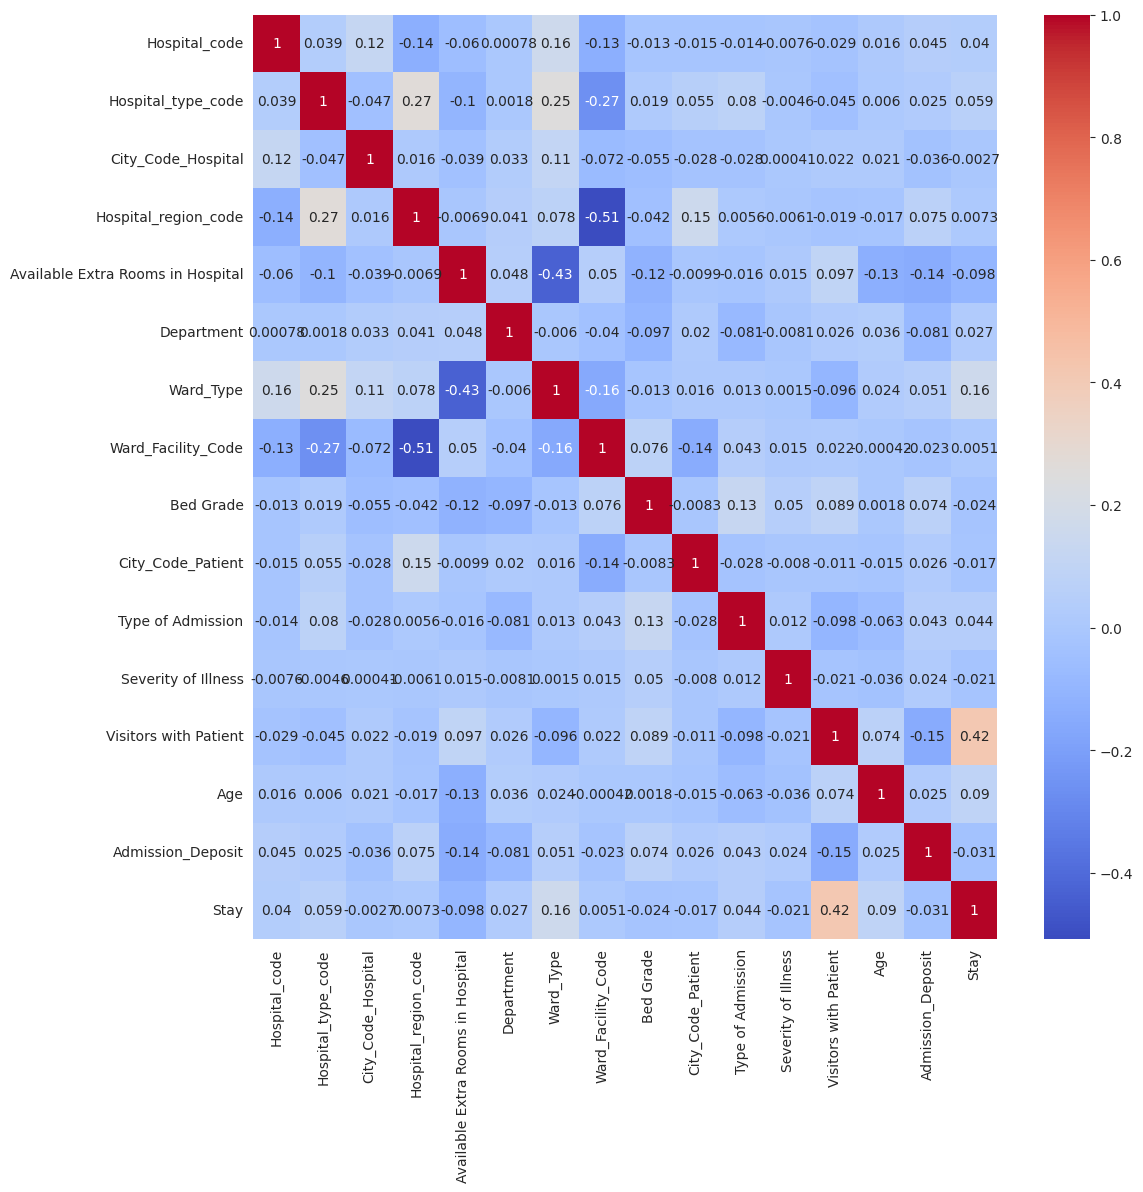

In [ ]:
# Loading the dataset
train = pd.read_csv('train_data.csv')
train.head()

# Filling missing values
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']), inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']), inplace=True)

# Dropping unnecessary columns
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

# Separating categorical and numerical columns
cat_cols = []
num_cols = []

for col in train.columns:
    if train[col].dtypes == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

# Plotting categorical features
i = 1
plt.figure(figsize=(15, 20))
for col in cat_cols:
    plt.subplot(5, 2, i)
    sns.countplot(train[col])
    i += 1
plt.show()

# Transforming target variable 'Stay'
train['Stay'].replace('More than 100 Days', '>100', inplace=True)
train['Stay'] = train['Stay'].replace({'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 2, '61-70': 2, '71-80': 2, '81-90': 2, '91-100': 2, '>100': 2})

# Plotting numerical features
i = 1
plt.figure(figsize=(15, 20))
for col in num_cols:
    plt.subplot(4, 2, i)
    sns.distplot(train[col])
    i += 1
plt.show()

# Label encoding categorical features
le = LabelEncoder()
cat_cols.append('Bed Grade')
cat_cols.append('City_Code_Hospital')
cat_cols.append('City_Code_Patient')
for col in cat_cols:
    train[col] = le.fit_transform(train[col])

num_cols.remove('Bed Grade')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')

# Correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

# Standardizing numerical features
ss = StandardScaler()
train[num_cols] = ss.fit_transform(train[num_cols].values)

# Splitting data into features and target
y = train['Stay']
X = train.drop('Stay', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Training and evaluating models without SMOTE:
LogisticRegression - Accuracy: 0.5623351337771637
RandomForestClassifier - Accuracy: 0.5997676171335259
DecisionTreeClassifier - Accuracy: 0.5214483105137545
KNeighborsClassifier - Accuracy: 0.5556462755935184
CatBoostClassifier - Accuracy: 0.6298831805049617
XGBClassifier - Accuracy: 0.63002449441025
GradientBoostingClassifier - Accuracy: 0.6087960055269439

Training and evaluating models with SMOTE:
LogisticRegression - Accuracy: 0.5414834819746263
RandomForestClassifier - Accuracy: 0.590189674663987
DecisionTreeClassifier - Accuracy: 0.5209458610727296
KNeighborsClassifier - Accuracy: 0.533774023363899
CatBoostClassifier - Accuracy: 0.619410249968597
XGBClassifier - Accuracy: 0.6182954402713227
GradientBoostingClassifier - Accuracy: 0.5948216304484362

Training and evaluating Neural Network without SMOTE:
Neural Network - Accuracy: 0.6013534665107727

Training and evaluating Neural Network with SMOTE:
Neural Network - Accuracy: 0.5714420

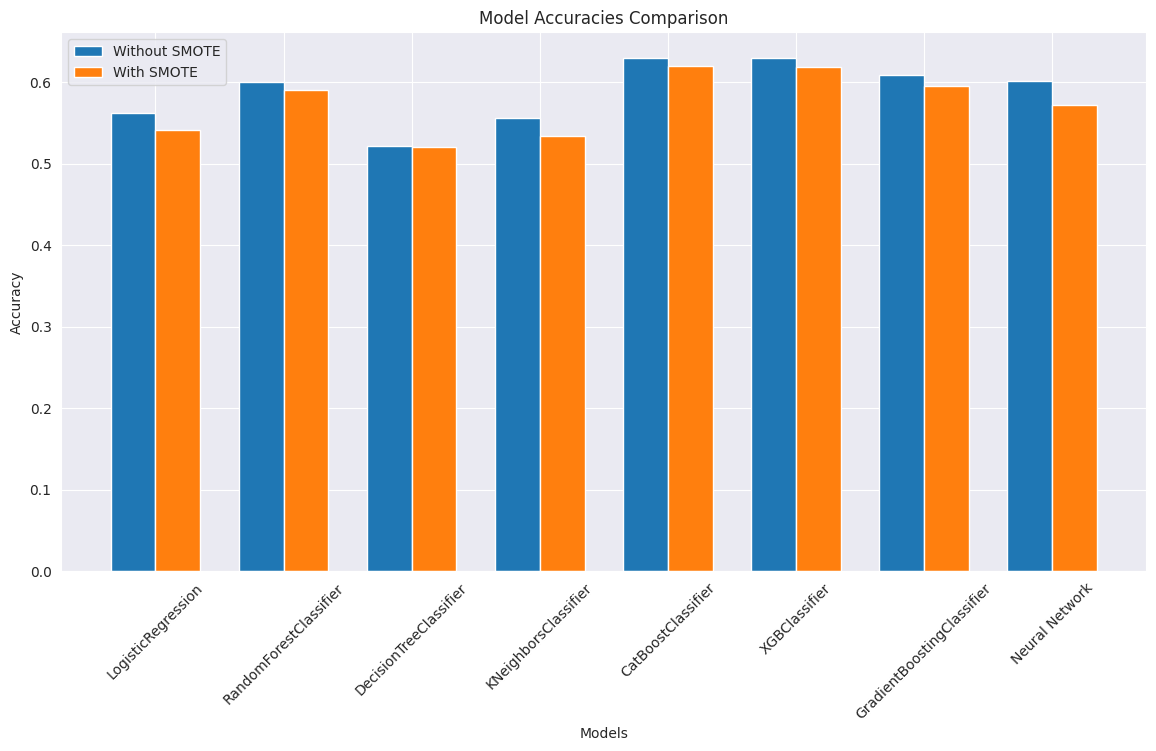

                        Model  Accuracy without SMOTE  Accuracy with SMOTE
4          CatBoostClassifier                0.629883             0.619410
5               XGBClassifier                0.630024             0.618295
6  GradientBoostingClassifier                0.608796             0.594822
1      RandomForestClassifier                0.599768             0.590190
7              Neural Network                0.601353             0.571442
0          LogisticRegression                0.562335             0.541483
3        KNeighborsClassifier                0.555646             0.533774
2      DecisionTreeClassifier                0.521448             0.520946


In [ ]:
# Initializing models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Training and evaluating models without SMOTE
print("Training and evaluating models without SMOTE:")
accuracy_scores_no_smote = []
for key, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_no_smote.append(accuracy)
    print(f"{key} - Accuracy: {accuracy}")

# Trainong and evaluating models with SMOTE
print("\nTraining and evaluating models with SMOTE:")
accuracy_scores_smote = []
for key, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_smote.append(accuracy)
    print(f"{key} - Accuracy: {accuracy}")

# Training and evaluating Neural Network without SMOTE
print("\nTraining and evaluating Neural Network without SMOTE:")
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)
nn_loss, nn_accuracy_no_smote = nn_model.evaluate(X_test, y_test, verbose=0)
accuracy_scores_no_smote.append(nn_accuracy_no_smote)
print(f"Neural Network - Accuracy: {nn_accuracy_no_smote}")

# Training and evaluating Neural Network with SMOTE
print("\nTraining and evaluating Neural Network with SMOTE:")
nn_model_smote = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
nn_model_smote.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model_smote.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)
nn_loss_smote, nn_accuracy_smote = nn_model_smote.evaluate(X_test, y_test, verbose=0)
accuracy_scores_smote.append(nn_accuracy_smote)
print(f"Neural Network - Accuracy: {nn_accuracy_smote}")

# Plotting model accuracies comparison
model_names = list(models.keys()) + ['Neural Network']
plt.figure(figsize=(14, 7))
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, accuracy_scores_no_smote, width, label='Without SMOTE')
plt.bar(x + width/2, accuracy_scores_smote, width, label='With SMOTE')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.show()

# Creating comparison table
comparison_table = pd.DataFrame({
    'Model': model_names,
    'Accuracy without SMOTE': accuracy_scores_no_smote,
    'Accuracy with SMOTE': accuracy_scores_smote
})

comparison_table.sort_values(by='Accuracy with SMOTE', ascending=False, inplace=True)
print(comparison_table)


In [ ]:
# Hyperparameter tuning XGBoost
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.625 total time=  50.5s
[CV 2/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.616 total time=  30.1s
[CV 3/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, objective=binary:logistic, subsample=1.0;, score=0.605 total time=  30.1s
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.635 total time=  37.9s
[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.627 total time=  34.3s
[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, objective=binary:logistic, subsample=0.8;, score=0.614 total time=  37.8s
[CV 1/3] END colsample_bytre

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=600, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=3)

In [ ]:
grid.best_score_

0.6251672225048518

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6546916216555709
[[10467  9289   593]
 [ 5474 22692  2713]
 [  648  3275  8537]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.57     20349
           1       0.64      0.73      0.69     30879
           2       0.72      0.69      0.70     12460

    accuracy                           0.65     63688
   macro avg       0.67      0.64      0.65     63688
weighted avg       0.65      0.65      0.65     63688



In [ ]:
# Hyperparamter tuning CatBoost
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Defining the parameter grid for CatBoost
catboost_params = {
    'depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'iterations': [100, 200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Initializing the CatBoostClassifier
catboost = CatBoostClassifier(verbose=0)

# Performing RandomizedSearchCV for CatBoost
catboost_grid = RandomizedSearchCV(catboost, param_distributions=catboost_params, cv=3, verbose=3, n_iter=5)
catboost_grid.fit(X_train, y_train)

# Displaying the best score and best estimator
print("Best Score for CatBoost:", catboost_grid.best_score_)
print("Best Estimator for CatBoost:", catboost_grid.best_estimator_)

# Predicting using the best estimator
y_pred_catboost = catboost_grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))
print("Classification Report:\n", classification_report(y_test, y_pred_catboost))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END depth=6, iterations=100, l2_leaf_reg=3, learning_rate=0.1;, score=0.615 total time=  19.7s
[CV 2/3] END depth=6, iterations=100, l2_leaf_reg=3, learning_rate=0.1;, score=0.610 total time=  20.5s
[CV 3/3] END depth=6, iterations=100, l2_leaf_reg=3, learning_rate=0.1;, score=0.611 total time=  14.9s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.591 total time=  10.9s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.587 total time=  11.2s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.588 total time=   9.2s
[CV 1/3] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.05;, score=0.580 total time=   6.6s
[CV 2/3] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.05;, score=0.576 total time=   8.6s
[CV 3/3] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.05;, score=0.576 total time=   6.9

In [ ]:
# Best estimator from XGBoost tuning
best_xgb = grid.best_estimator_

# Predict using the best estimator for XGBoost
y_pred_xgb = best_xgb.predict(X_test)

# Metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Metrics for CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
confusion_catboost = confusion_matrix(y_test, y_pred_catboost)
classification_report_catboost = classification_report(y_test, y_pred_catboost, output_dict=True)
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted')
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted')
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted')

# Displaying results
print("\nXGBoost Best Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", confusion_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

print("\nCatBoost Best Model Performance:")
print("Accuracy:", accuracy_catboost)
print("Confusion Matrix:\n", confusion_catboost)
print("Classification Report:\n", classification_report(y_test, y_pred_catboost))

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'XGBoost': [accuracy_xgb, f1_xgb, precision_xgb, recall_xgb],
    'CatBoost': [accuracy_catboost, f1_catboost, precision_catboost, recall_catboost]
})

print("\nComparison of Best Tuned Models:")
print(comparison_df)



XGBoost Best Model Performance:
Accuracy: 0.6546916216555709
Confusion Matrix:
 [[10467  9289   593]
 [ 5474 22692  2713]
 [  648  3275  8537]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.57     20349
           1       0.64      0.73      0.69     30879
           2       0.72      0.69      0.70     12460

    accuracy                           0.65     63688
   macro avg       0.67      0.64      0.65     63688
weighted avg       0.65      0.65      0.65     63688


CatBoost Best Model Performance:
Accuracy: 0.6237438763974376
Confusion Matrix:
 [[ 9383 10318   648]
 [ 5662 22065  3152]
 [  637  3546  8277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.46      0.52     20349
           1       0.61      0.71      0.66     30879
           2       0.69      0.66      0.67     12460

    accuracy                           0.62     63688
   macro

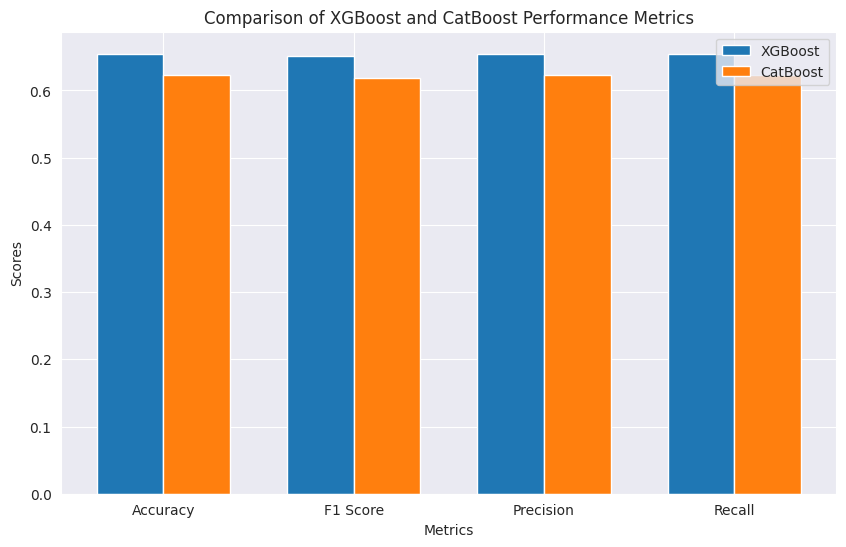

In [ ]:
# Generating comparison plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(comparison_df['Metric']))

bar1 = plt.bar(index, comparison_df['XGBoost'], bar_width, label='XGBoost')
bar2 = plt.bar(index + bar_width, comparison_df['CatBoost'], bar_width, label='CatBoost')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of XGBoost and CatBoost Performance Metrics')
plt.xticks(index + bar_width / 2, comparison_df['Metric'])
plt.legend()

plt.show()


In [ ]:
#viz for report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Loading the dataset
train = pd.read_csv('train_data.csv')

# Filling missing values
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']), inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']), inplace=True)

# Dropping unnecessary columns
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

# Separating categorical and numerical columns
cat_cols = []
num_cols = []

for col in train.columns:
    if train[col].dtypes == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

# Label encoding categorical features
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])

# Standardizing numerical features
ss = StandardScaler()
train[num_cols] = ss.fit_transform(train[num_cols].values)

# Splitting data into features and target
y = train['Stay']
X = train.drop('Stay', axis=1)

# Applyying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)



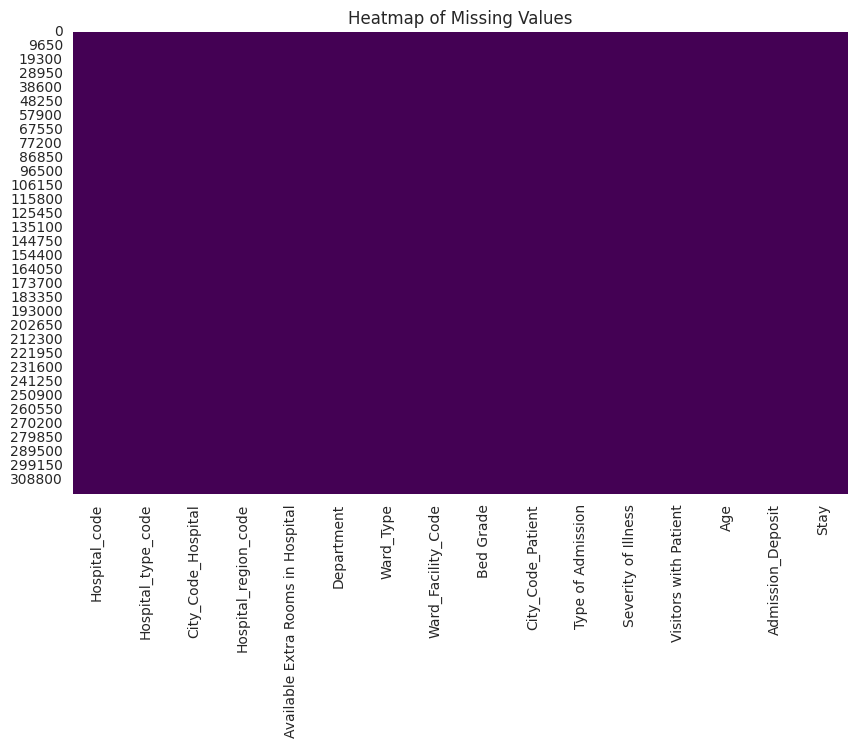

In [ ]:
# Visualization - Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Visualization - Bar plots of categorical variables before encoding
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(train[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualization - Histograms of numerical variables before scaling
train[num_cols].hist(figsize=(15, 10), bins=15)
plt.suptitle('Distribution of Numerical Features Before Scaling')
plt.show()

# Visualization - Heatmap of correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization - Bar plot of class distribution before and after applying SMOTE
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(x=y, ax=axs[0])
axs[0].set_title('Class Distribution Before SMOTE')
sns.countplot(x=y_train_smote, ax=axs[1])
axs[1].set_title('Class Distribution After SMOTE')
plt.show()


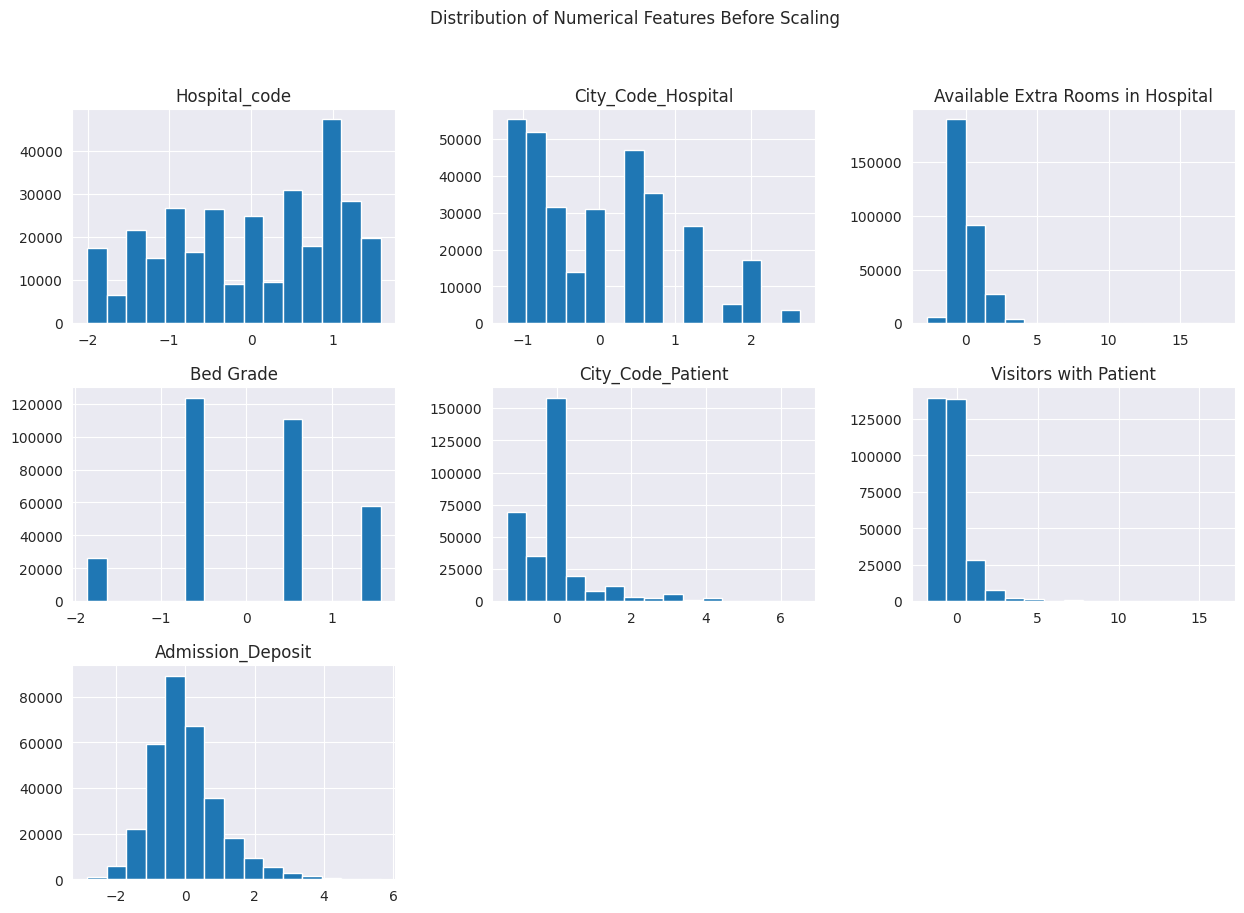

In [ ]:
# Visualization - Histograms of numerical variables before scaling
train[num_cols].hist(figsize=(15, 10), bins=15)
plt.suptitle('Distribution of Numerical Features Before Scaling')
plt.show()



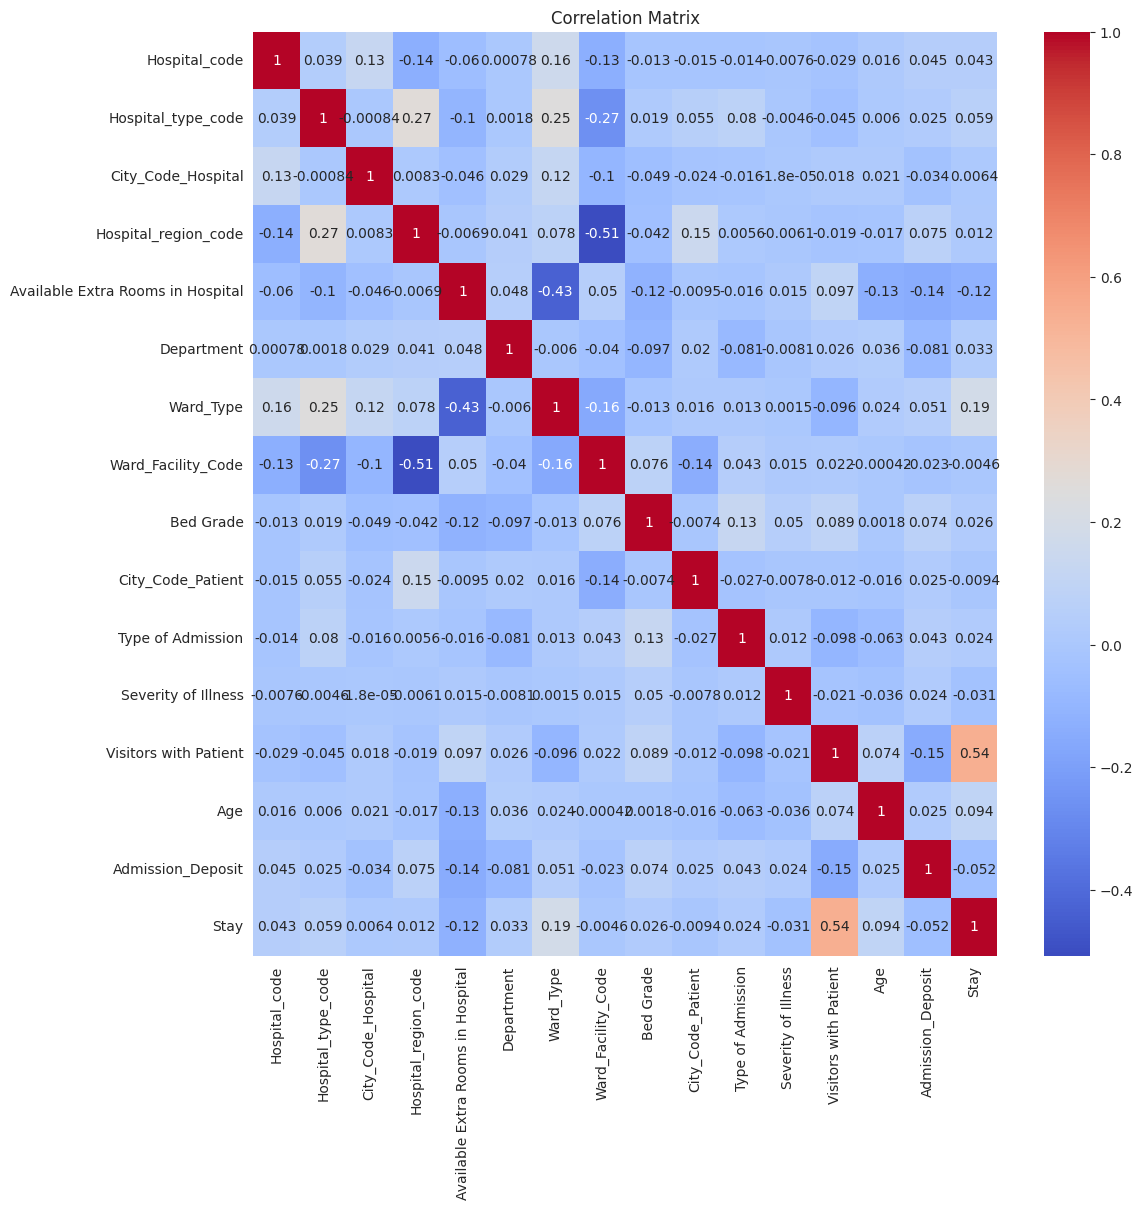

In [ ]:
#Visualization - Heatmap of correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



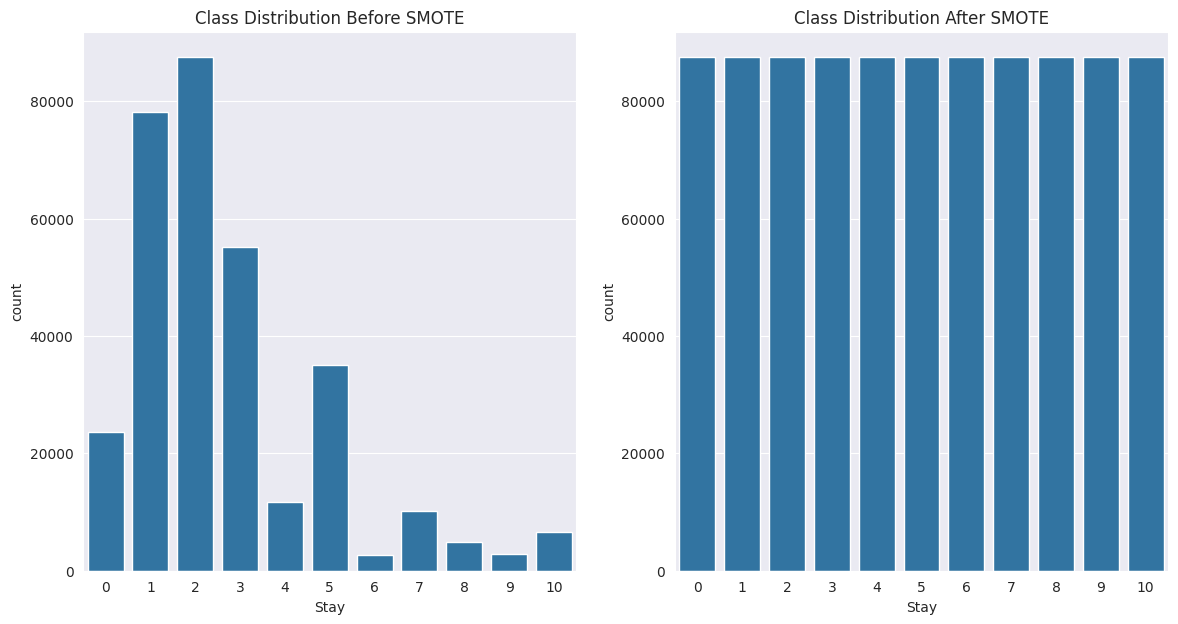

In [ ]:
# Visualization - Bar plot of class distribution before and after applying SMOTE
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(x=y, ax=axs[0])
axs[0].set_title('Class Distribution Before SMOTE')
sns.countplot(x=y_train_smote, ax=axs[1])
axs[1].set_title('Class Distribution After SMOTE')
plt.show()


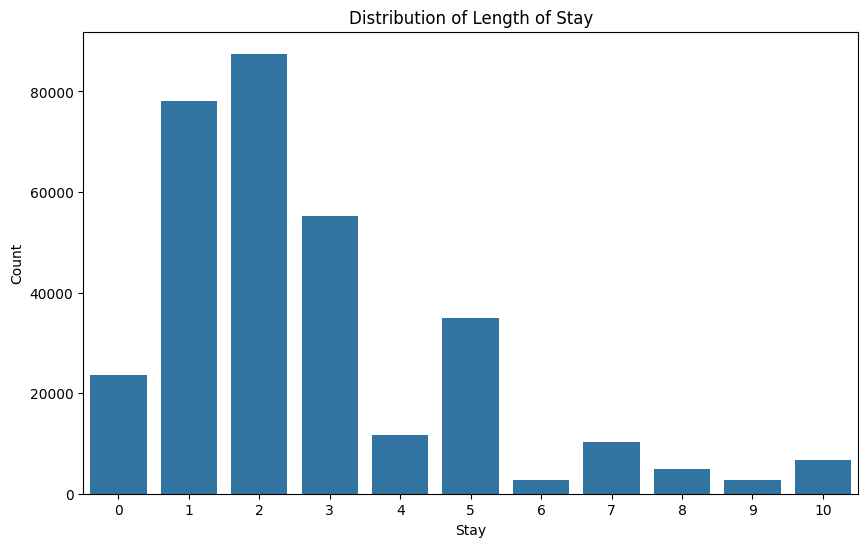

In [ ]:
# Loading the dataset
train = pd.read_csv('train_data.csv')

# Filling missing values
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace=True)
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace=True)

# Dropping unnecessary columns
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.select_dtypes(include=['object']).columns:
    train[col] = le.fit_transform(train[col])

# Distribution of target variable (Stay)
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Stay'])
plt.title('Distribution of Length of Stay')
plt.xlabel('Stay')
plt.ylabel('Count')
plt.show()


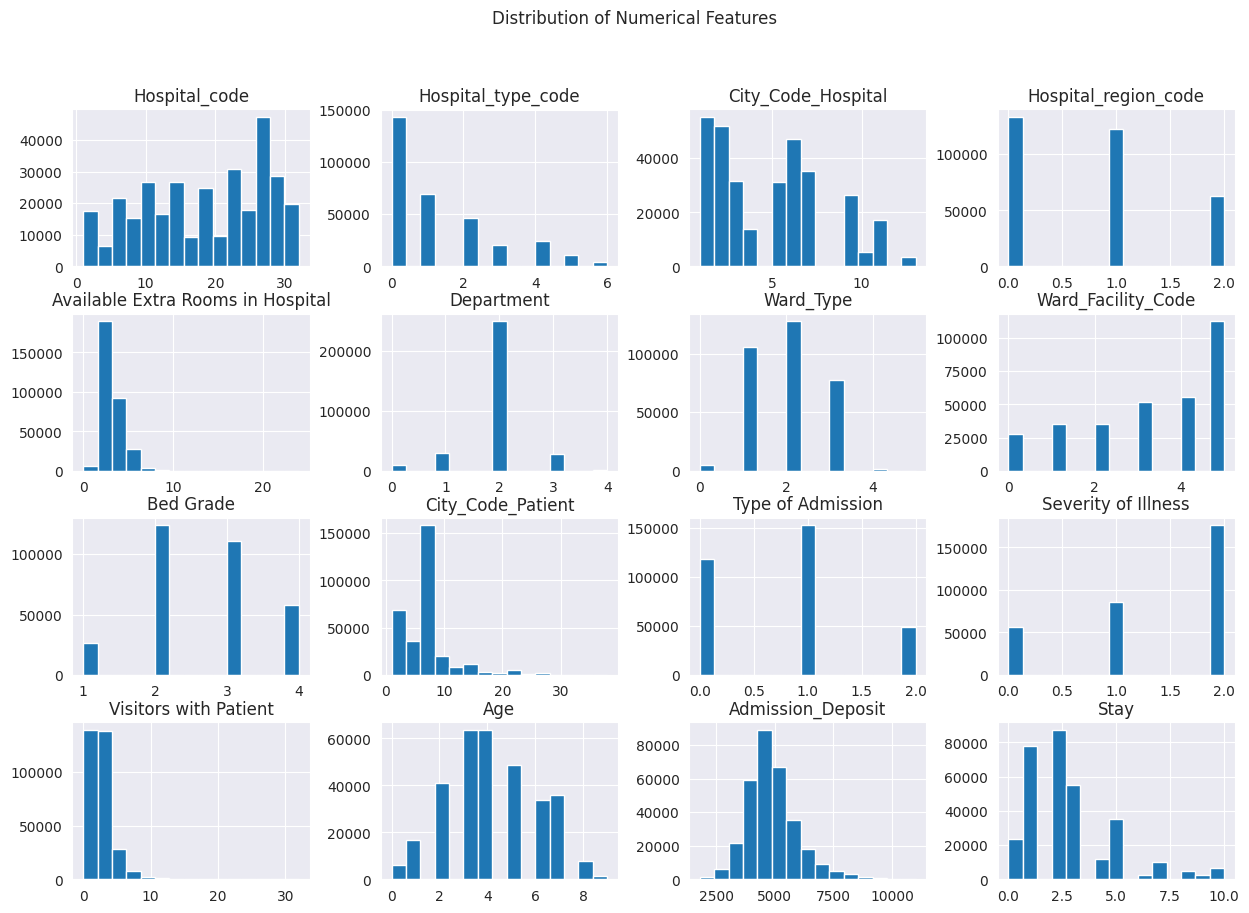

In [ ]:
# Distribution of numerical variables
train.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()


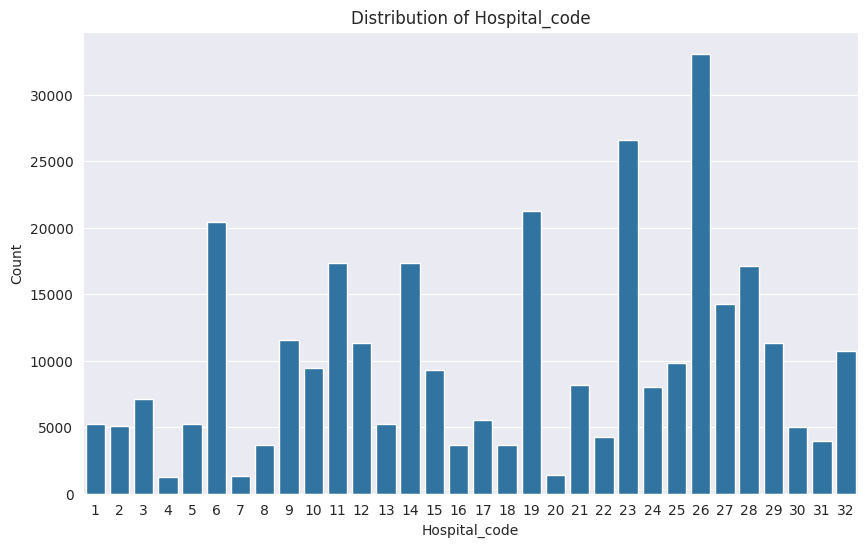

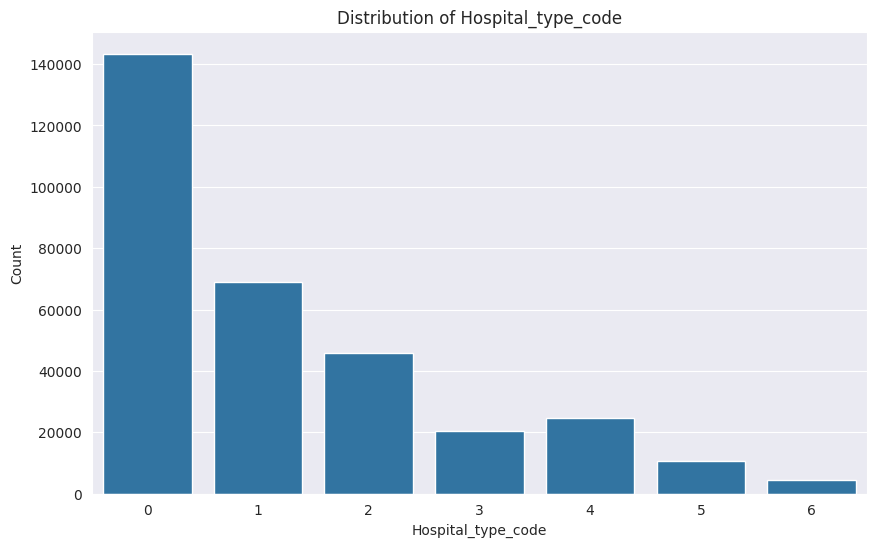

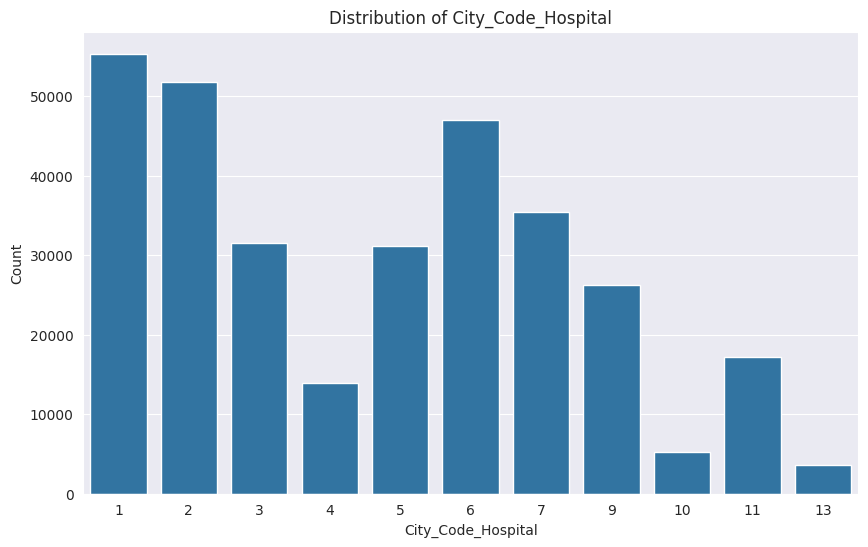

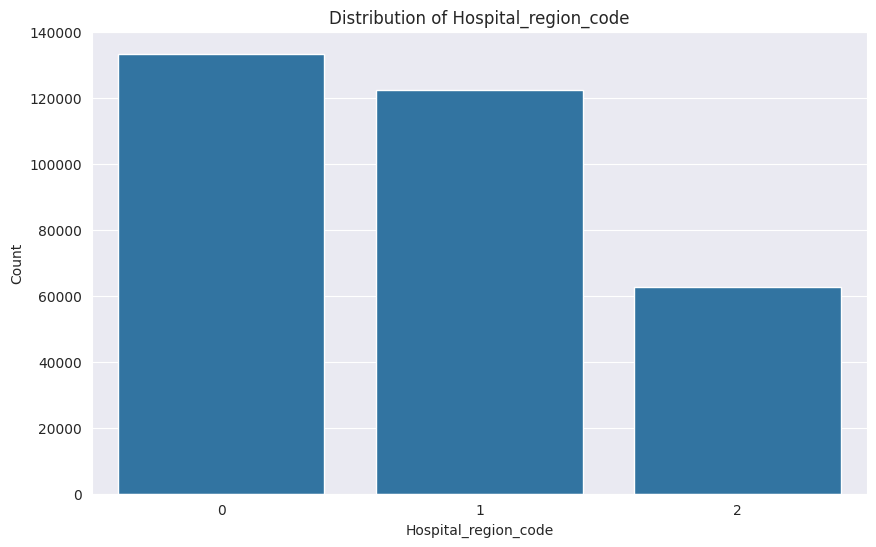

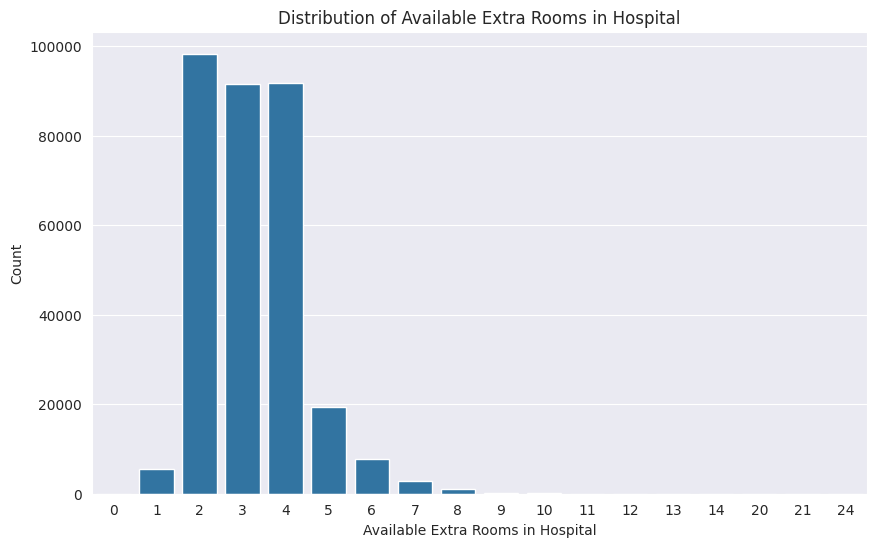

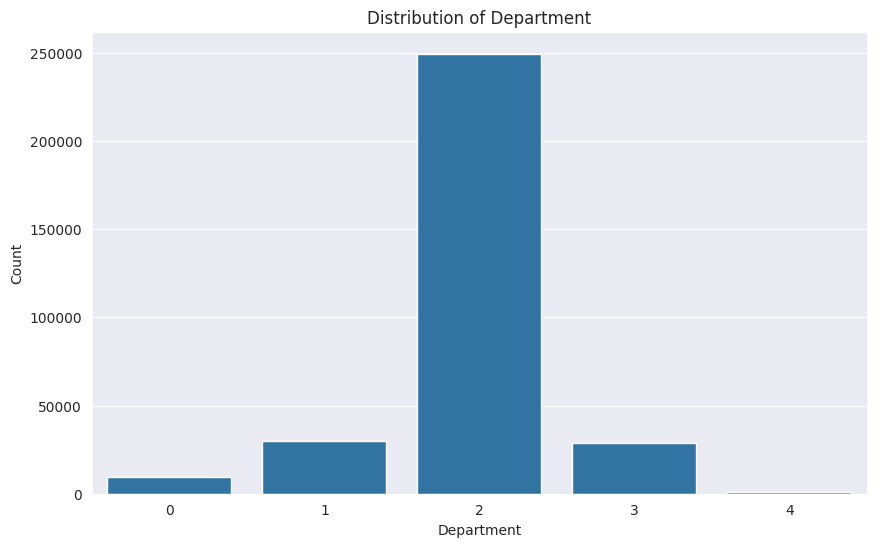

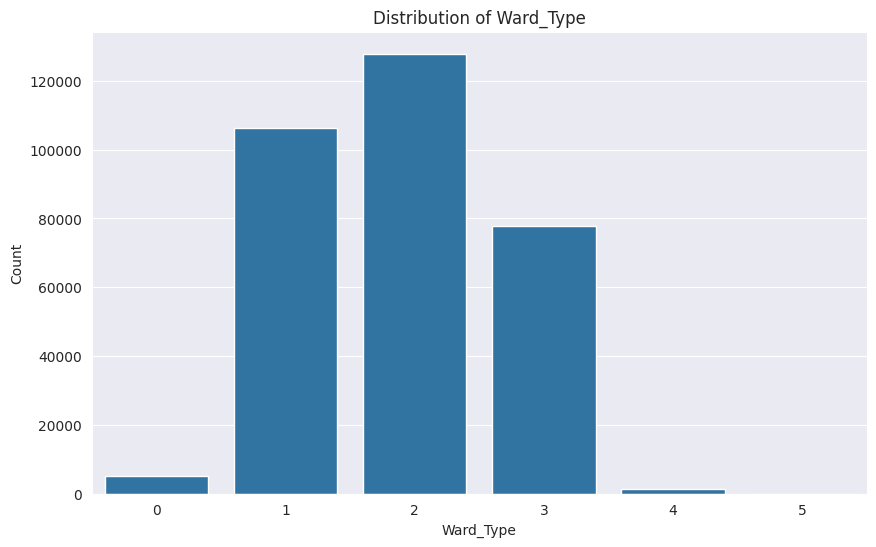

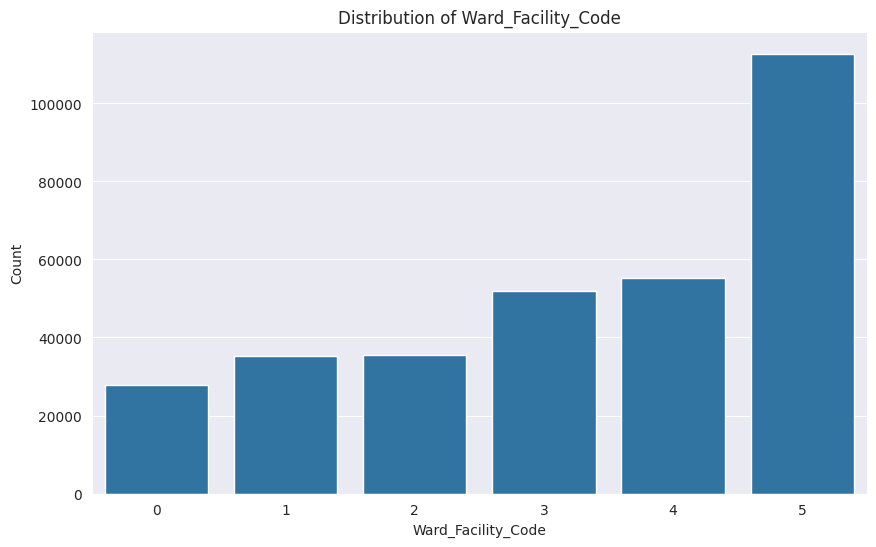

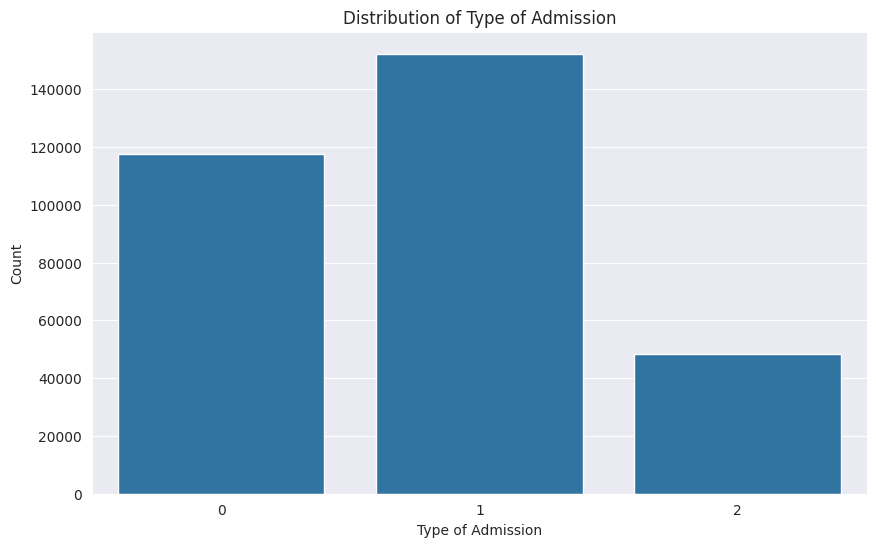

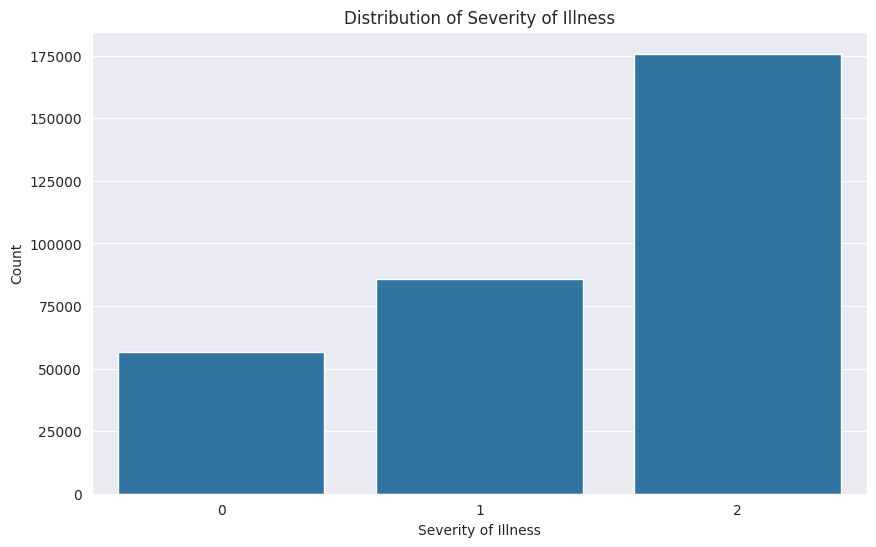

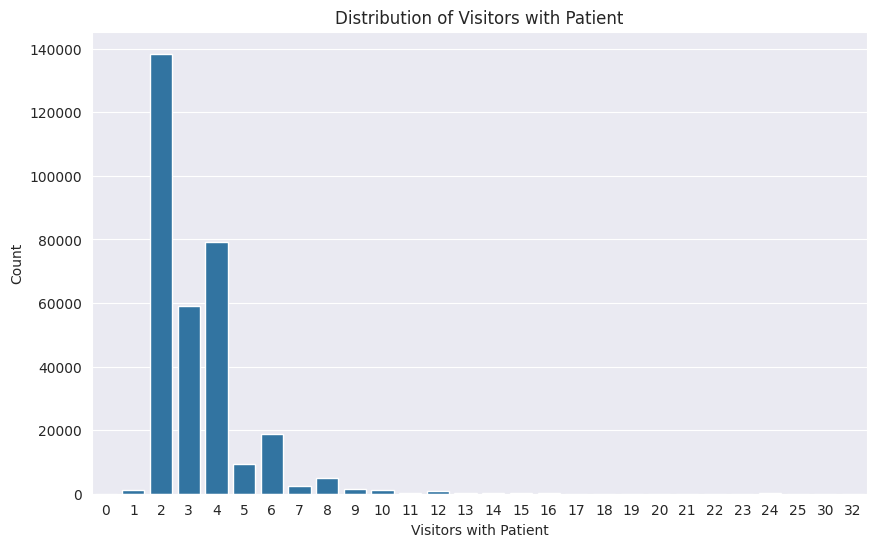

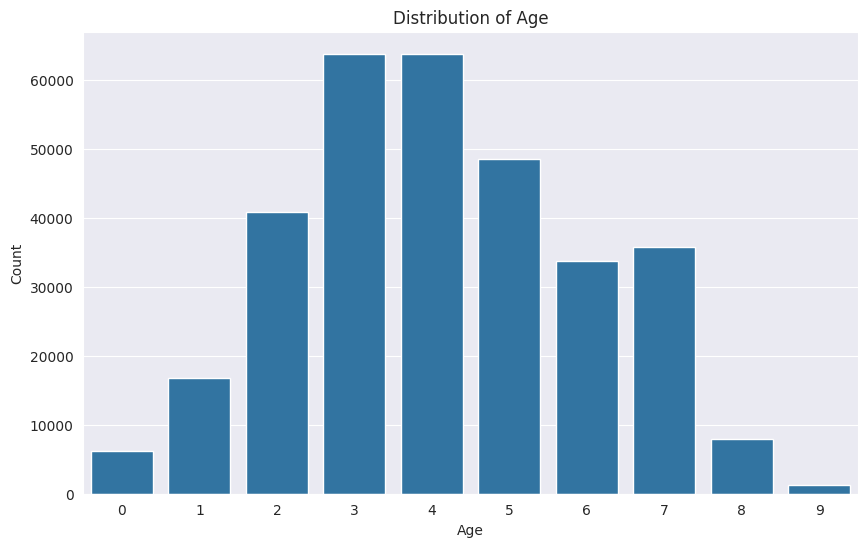

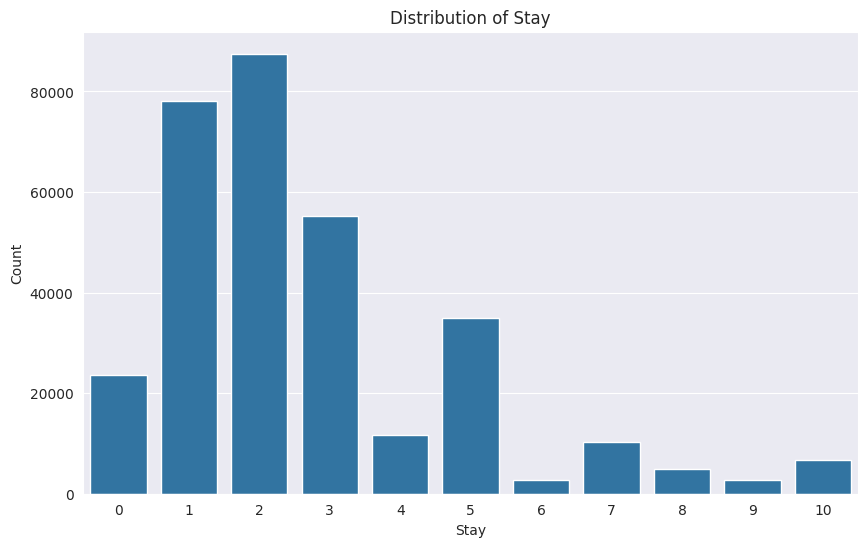

In [ ]:
# Distribution of categorical variables
categorical_cols = train.select_dtypes(include=['int64']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=train[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


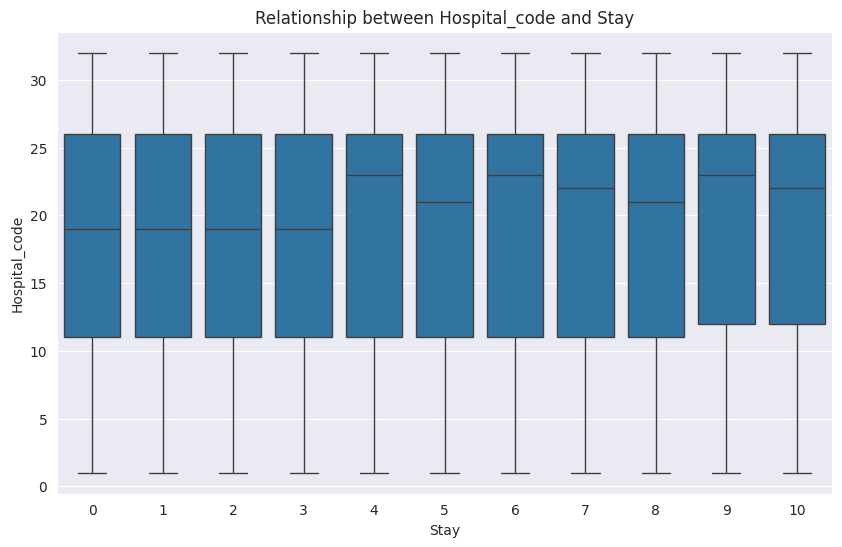

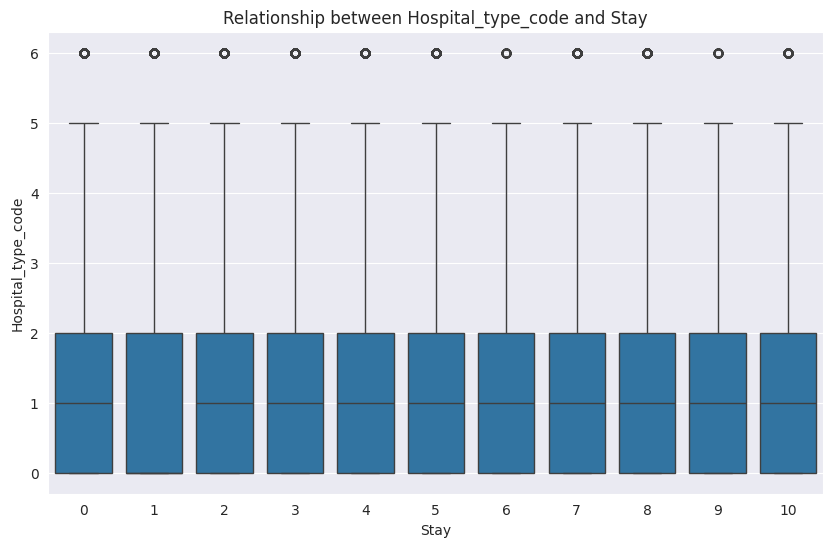

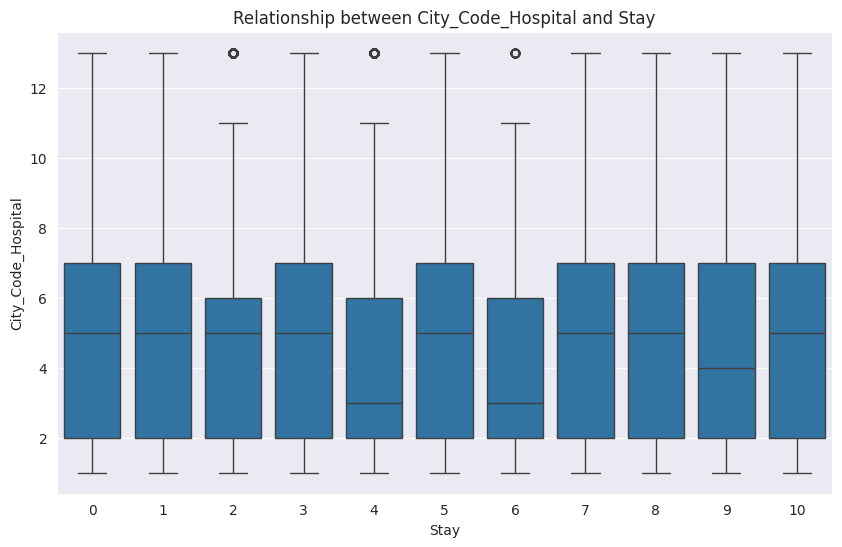

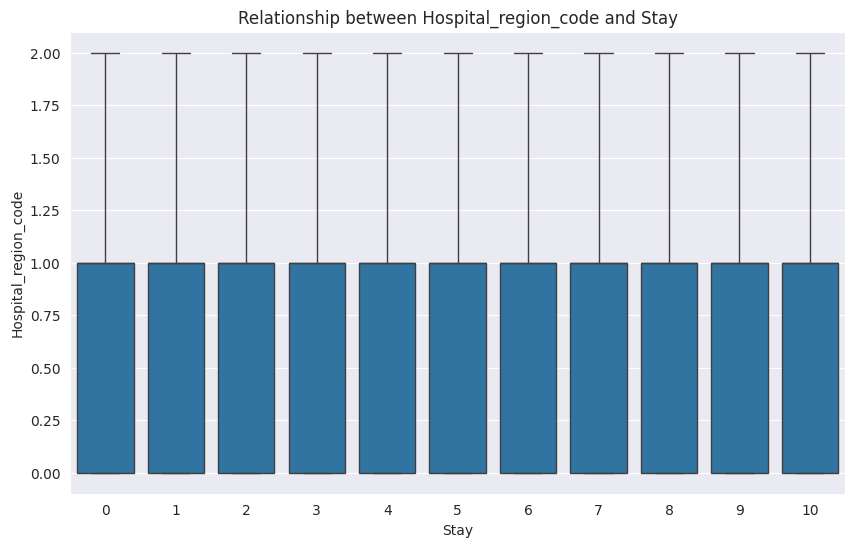

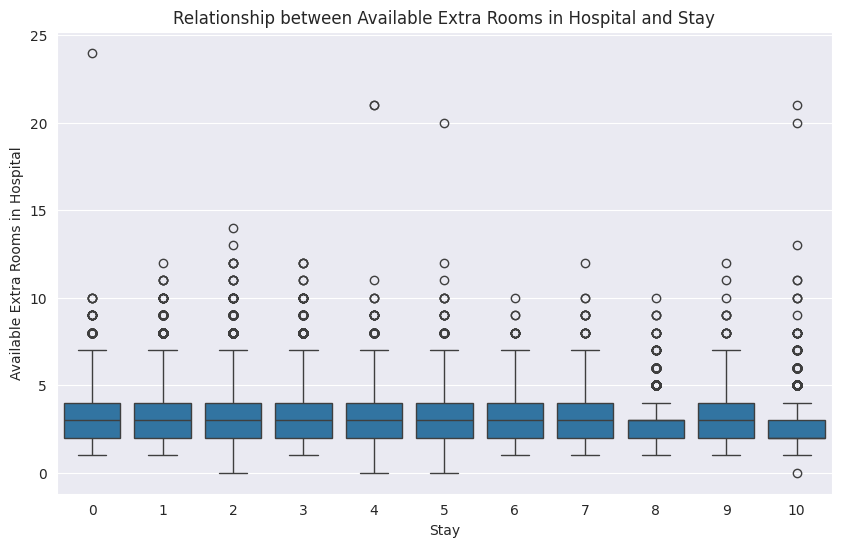

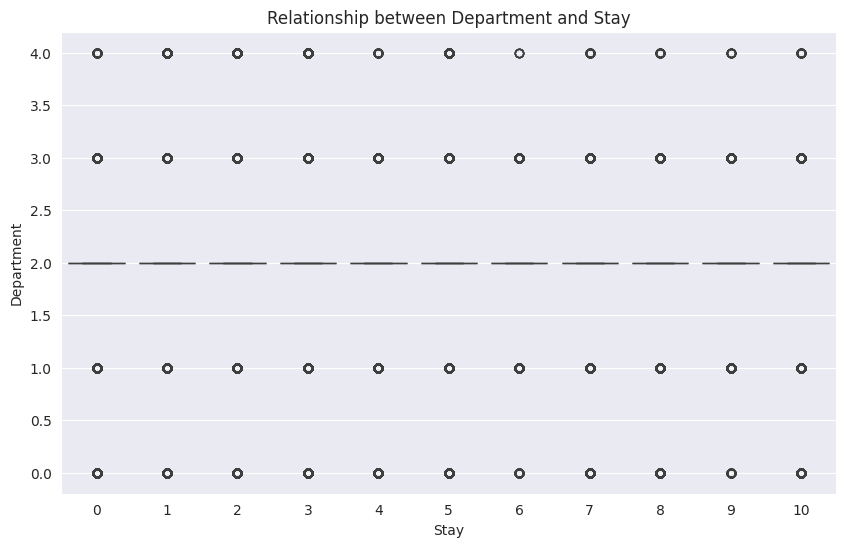

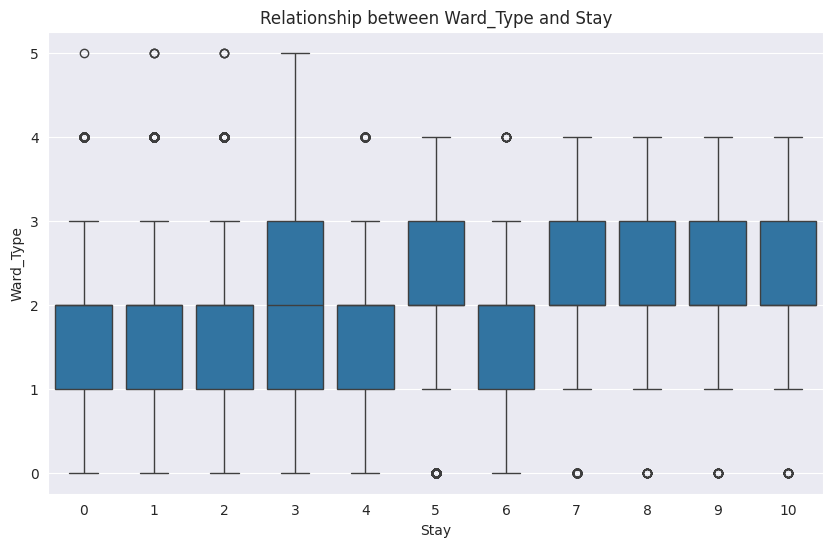

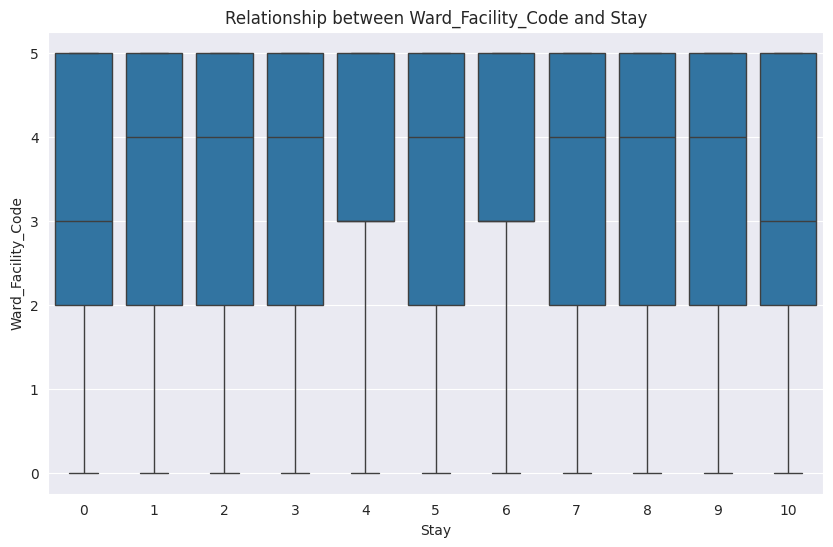

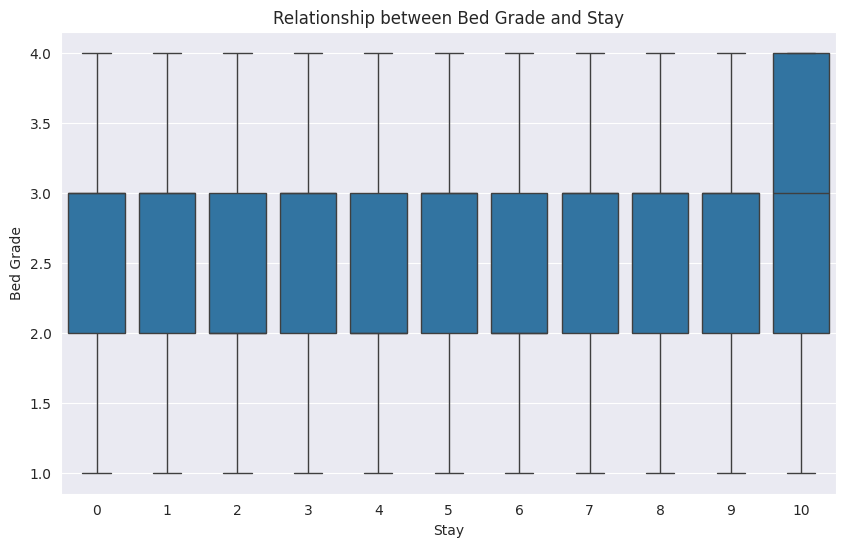

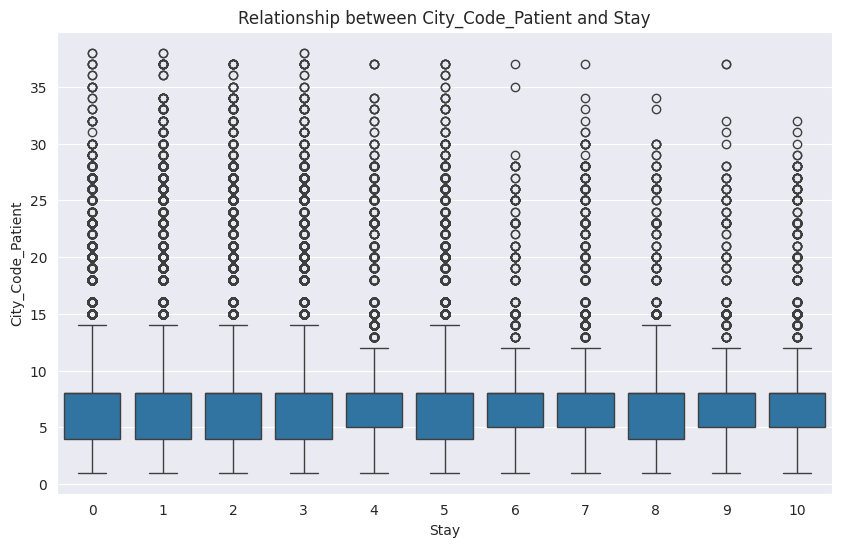

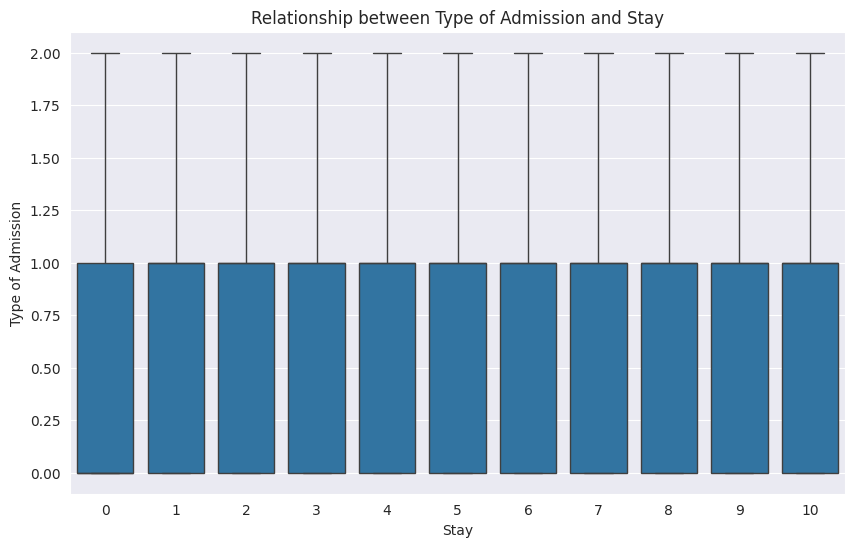

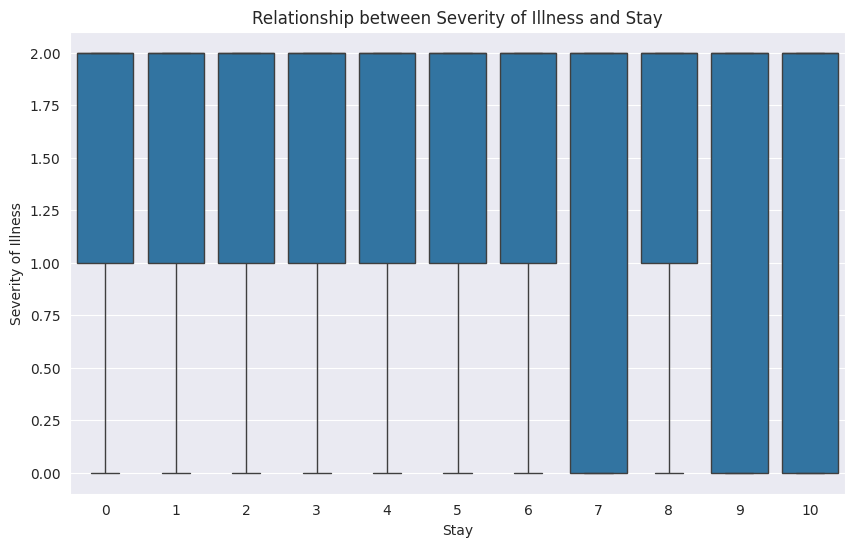

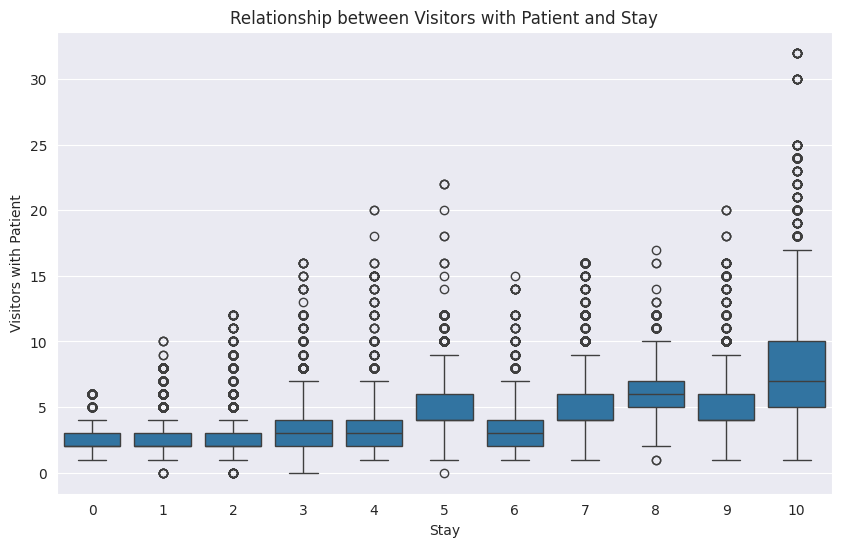

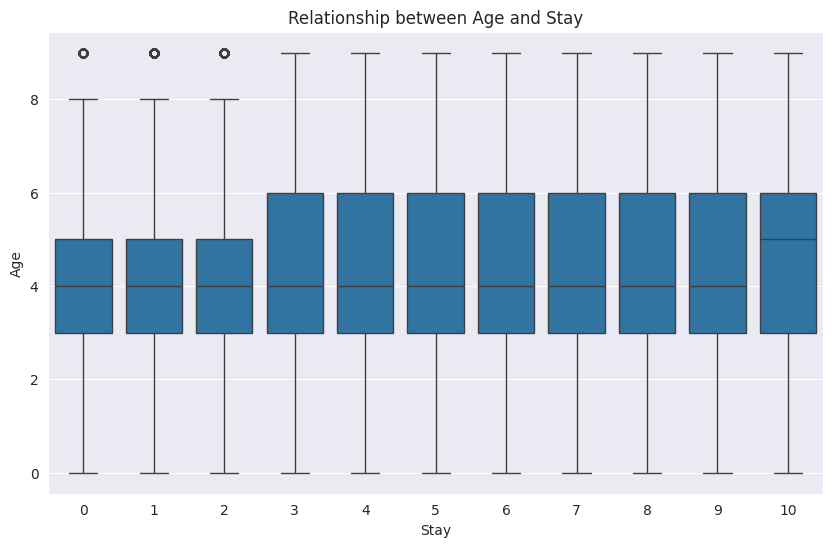

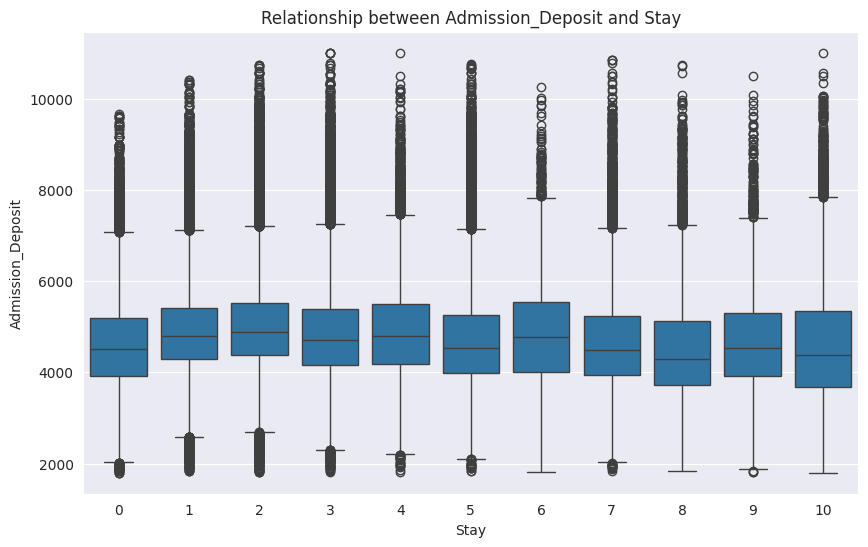

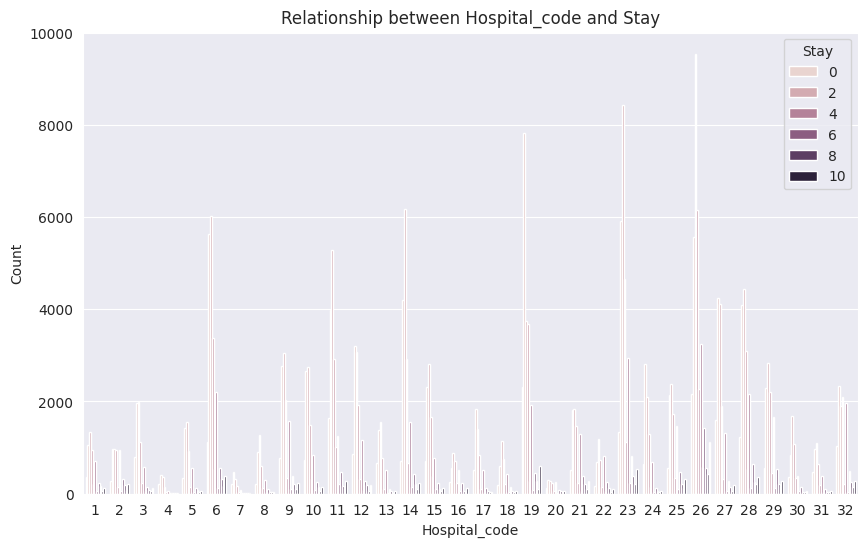

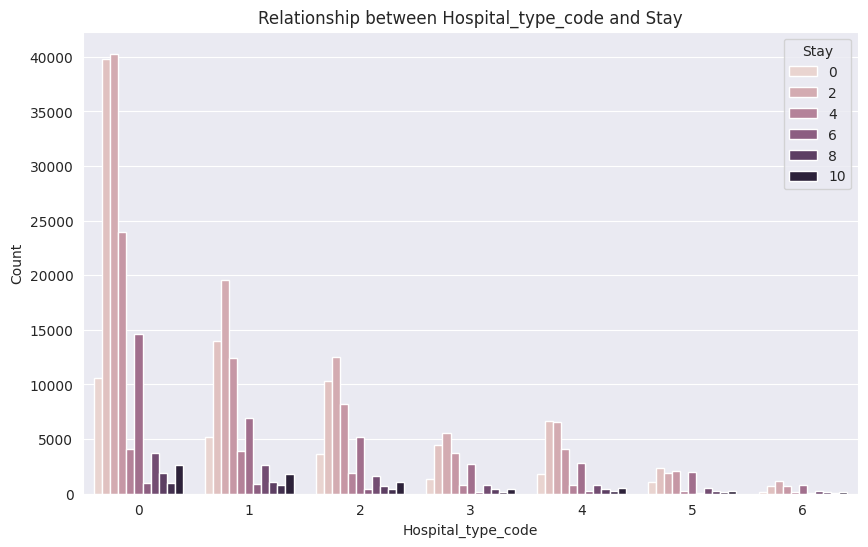

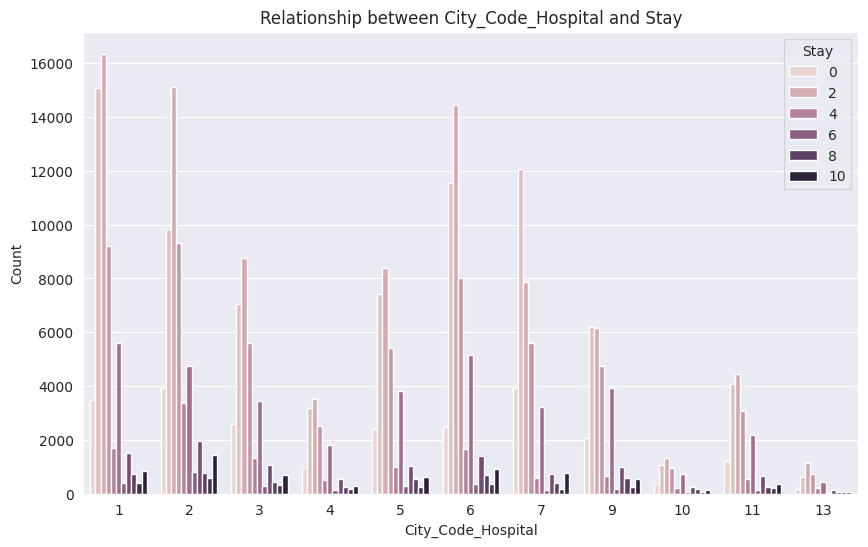

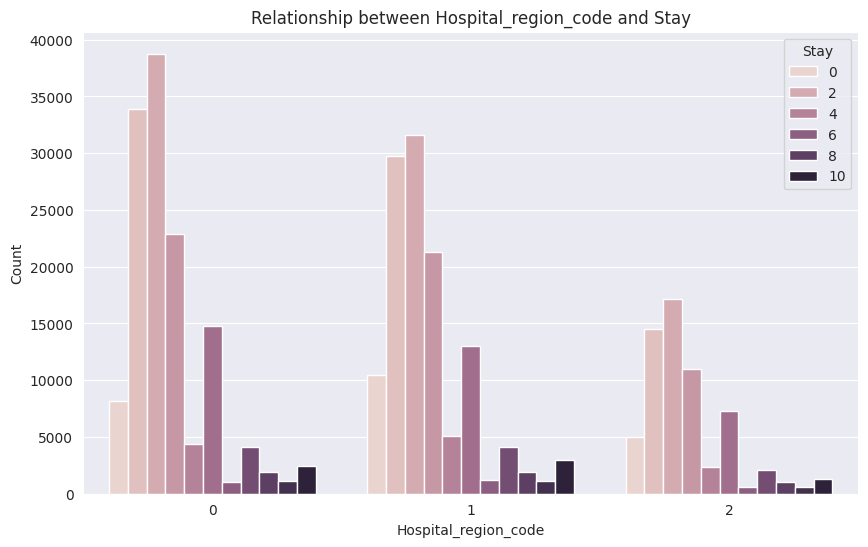

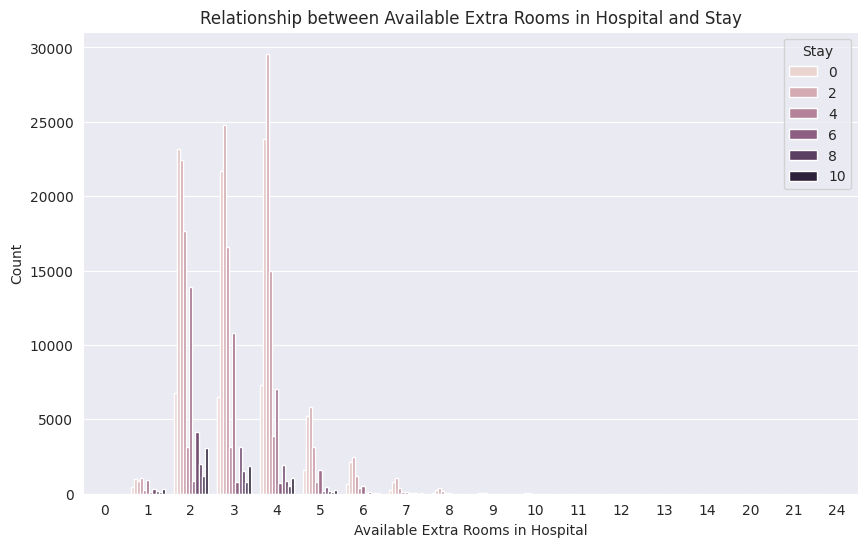

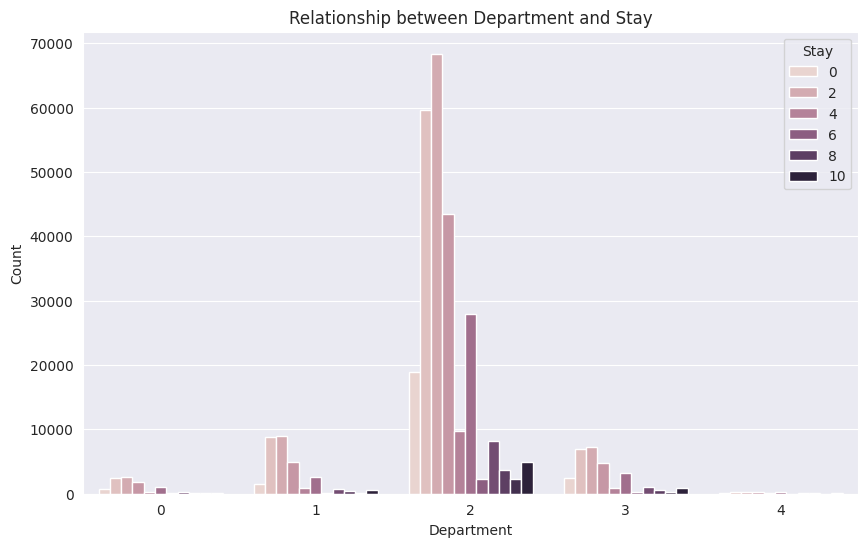

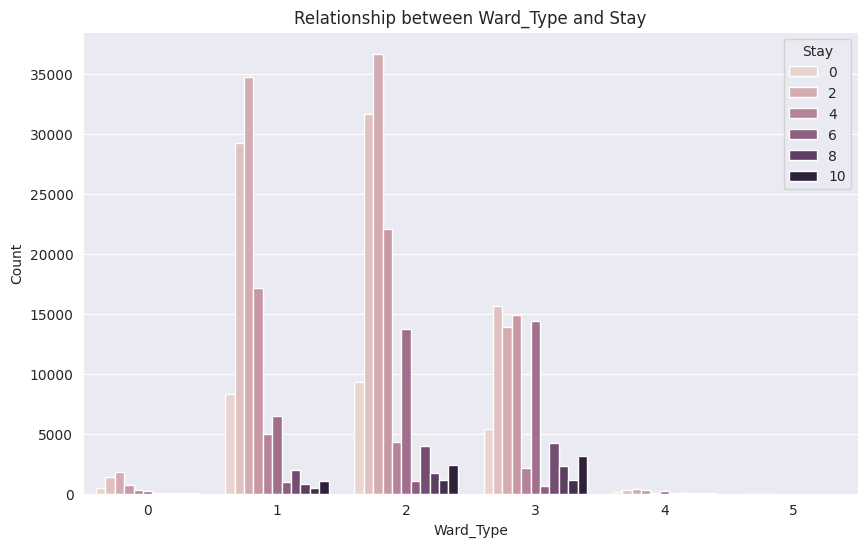

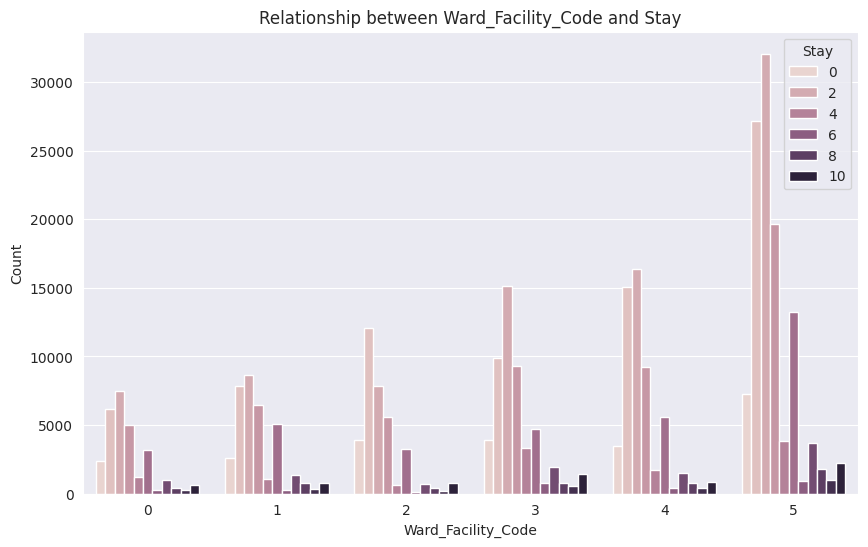

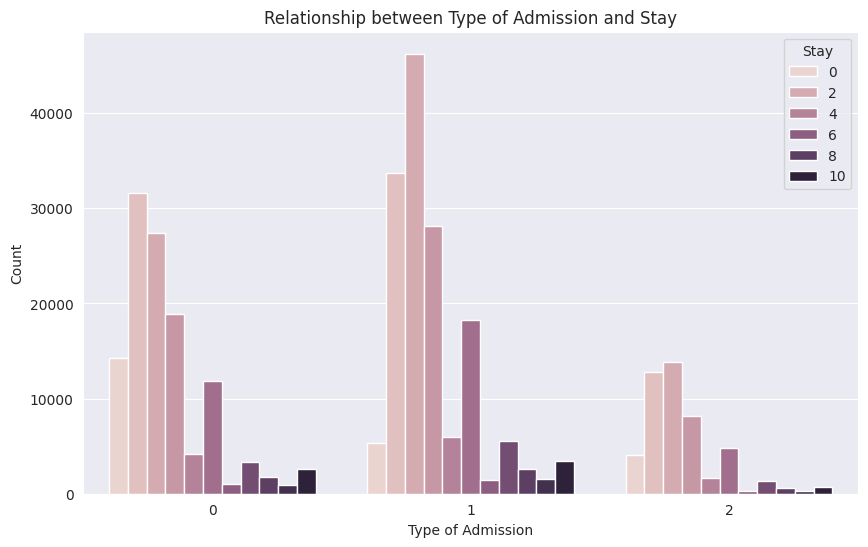

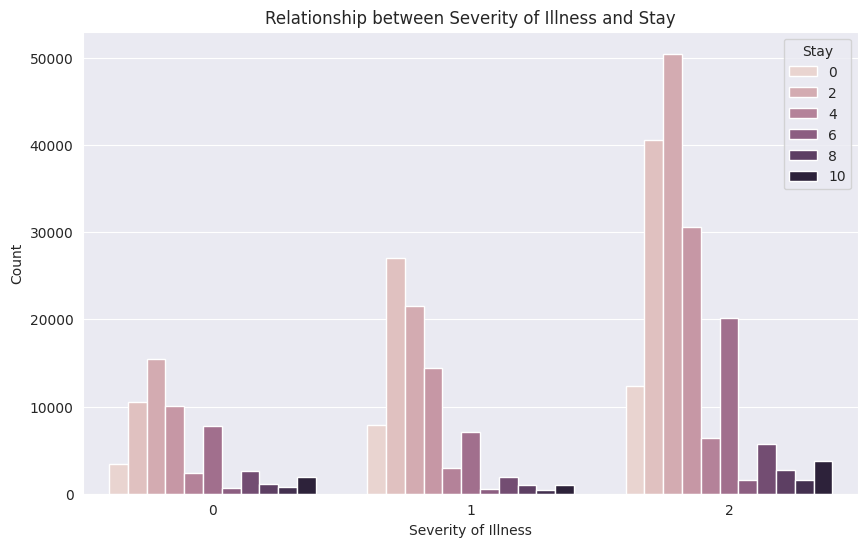

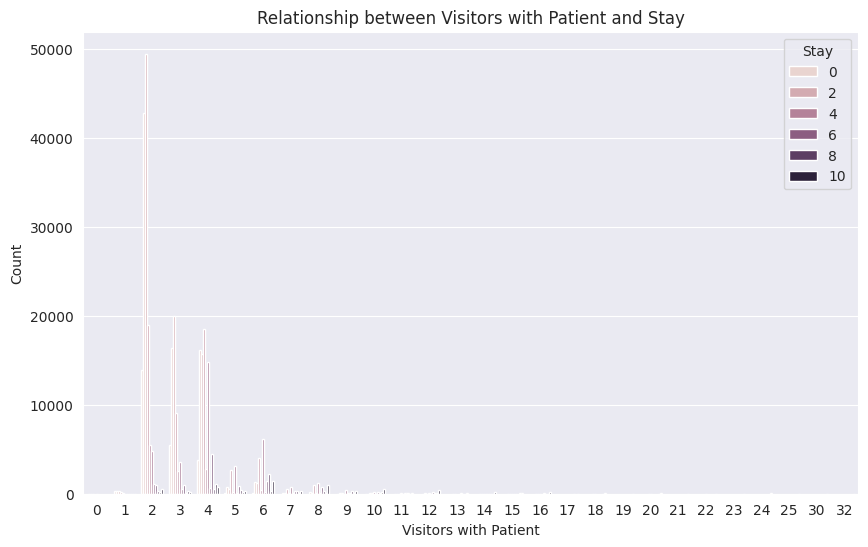

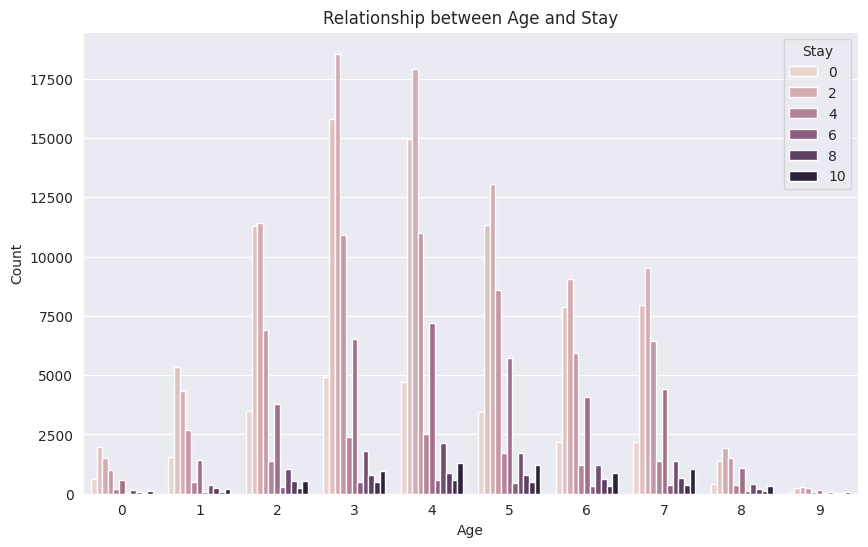

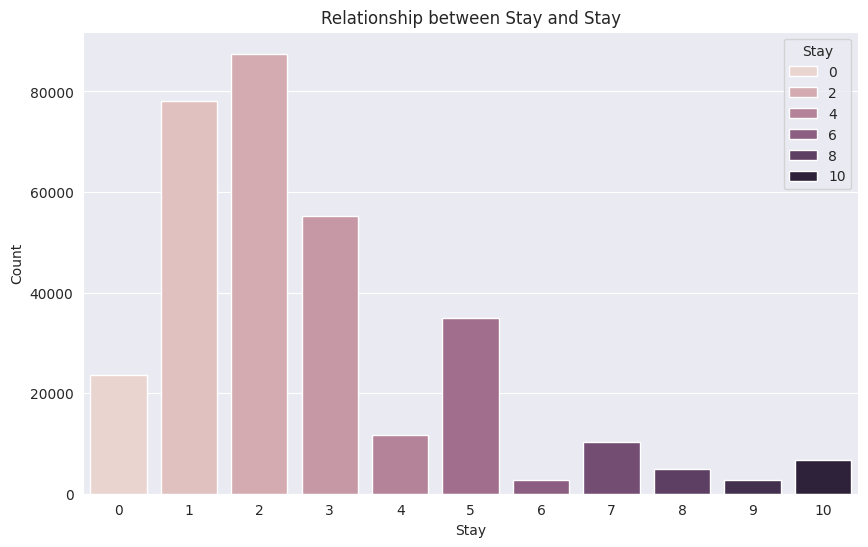

In [ ]:
# Relationship between numerical features and Stay
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Stay':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Stay', y=col, data=train)
        plt.title(f'Relationship between {col} and Stay')
        plt.xlabel('Stay')
        plt.ylabel(col)
        plt.show()

# Relationship between categorical features and Stay
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Stay', data=train)
    plt.title(f'Relationship between {col} and Stay')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


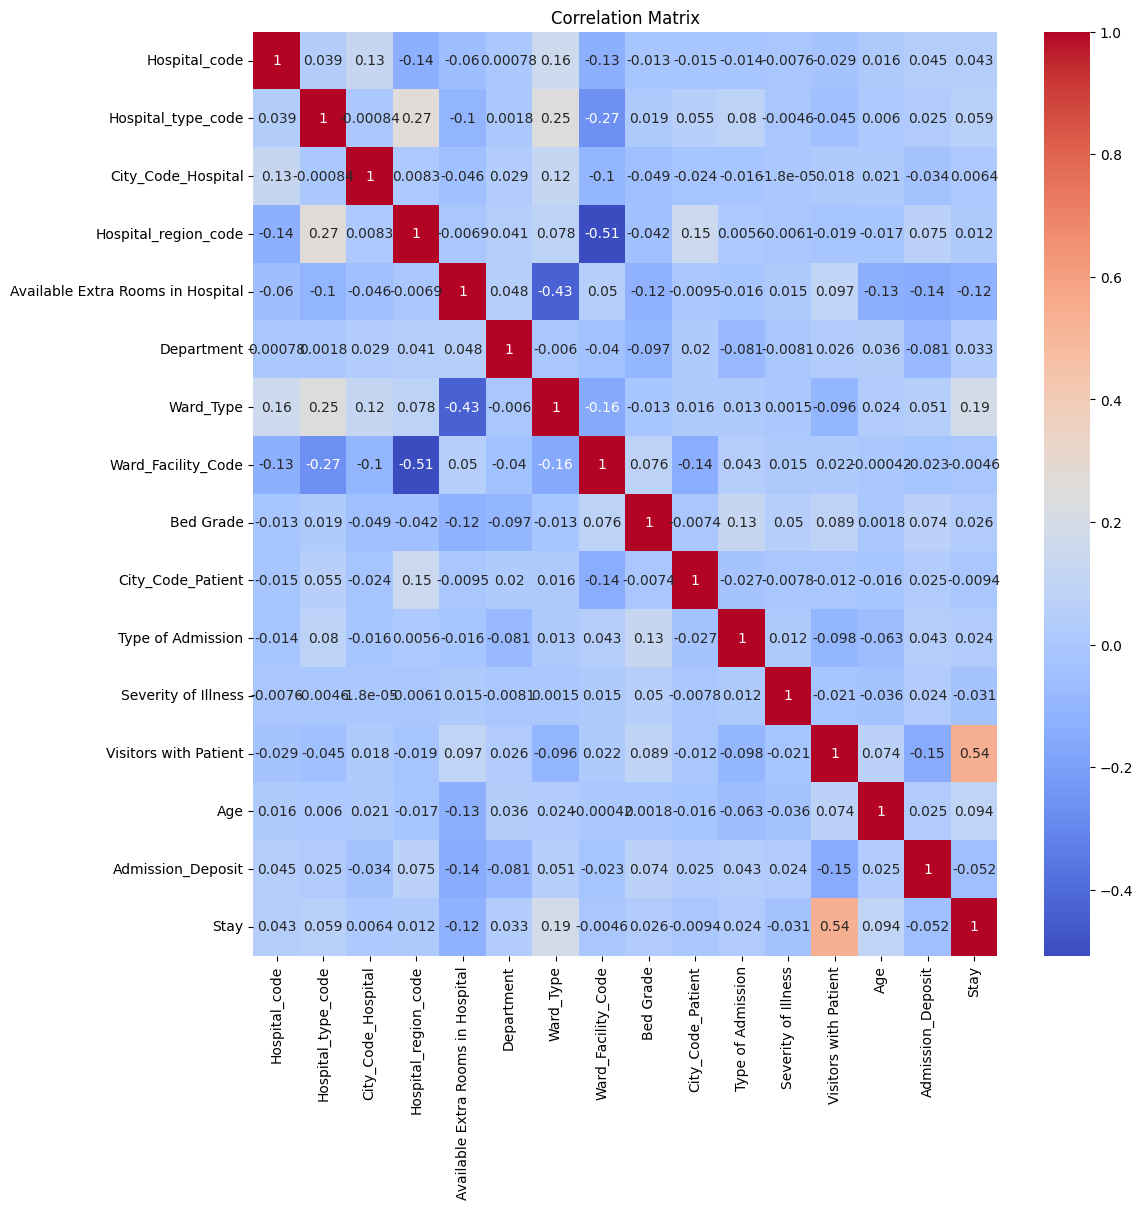

In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
